In [17]:
import numpy as np

# 1. Funktion zur Generierung der logistischen Serie
def generate_logistic_series(r, x0, num_iterations):
    """
    Generiert eine Serie von Werten der logistischen Gleichung.

    Args:
        r (float): Der Wachstumsparameter.
        x0 (float): Der Anfangswert.
        num_iterations (int): Die Anzahl der zu generierenden Iterationen.

    Returns:
        list: Eine Liste der generierten Werte.
    """
    series = [x0]
    for _ in range(num_iterations - 1):
        next_x = r * series[-1] * (1 - series[-1])
        series.append(next_x)
    return series

# Parameter für die logistische Gleichung
r = 4
x0 = 0.500001
num_iterations = 1000 # Anzahl der Iterationen für den Test

# Daten generieren
data = generate_logistic_series(r, x0, num_iterations)

# 2. Median berechnen und Daten kategorisieren
# Der Median teilt die Daten in zwei Hälften.
median_val = np.median(data)

binary_seq = []
n1 = 0 # Anzahl der Werte > Median
n2 = 0 # Anzahl der Werte <= Median
for x in data:
    if x > median_val:
        binary_seq.append('+')
        n1 += 1
    else:
        binary_seq.append('-')
        n2 += 1

N = n1 + n2 # Gesamtzahl der Werte

# 3. Runs zählen
# Ein Run ist eine ununterbrochene Sequenz gleicher Symbole.
runs = 0
if binary_seq: # Sicherstellen, dass die Liste nicht leer ist
    runs = 1 # Der erste Wert beginnt immer einen Run
    for i in range(1, len(binary_seq)):
        if binary_seq[i] != binary_seq[i-1]:
            runs += 1

# 4. Erwartete Anzahl und Standardabweichung der Runs berechnen
# Dies sind die Formeln für den Run-Test, wenn die Daten zufällig sind.
expected_runs = (2 * n1 * n2) / N + 1

# Berechnung der Varianz und Standardabweichung der Runs
if N > 1:
    variance_runs = (2 * n1 * n2 * (2 * n1 * n2 - N)) / (N**2 * (N - 1))
    std_dev_runs = np.sqrt(variance_runs)
else:
    std_dev_runs = 0 # Falls nur ein Datenpunkt vorhanden ist

# 5. Z-Statistik berechnen
# Die Z-Statistik misst, wie weit die beobachtete Anzahl von Runs von der erwarteten Anzahl abweicht,
# standardisiert durch die Standardabweichung.
if std_dev_runs > 0:
    z_statistic = (runs - expected_runs) / std_dev_runs
else:
    z_statistic = float('nan') # Not a number, wenn Standardabweichung 0 ist

# 6. Ergebnisinterpretation (Vergleich mit kritischen Z-Werten)
# Bei einem Signifikanzniveau von alpha = 0.05 (zweiseitig) sind die kritischen Z-Werte +/- 1.96.
# Wenn die Z-Statistik außerhalb dieses Bereichs liegt, lehnen wir die Nullhypothese der Zufälligkeit ab.
critical_z_lower = -1.96
critical_z_upper = 1.96

# Ausgabe der Ergebnisse
print("--- Ergebnisse des Run-Tests ---")
print(f"Anzahl der Iterationen (N): {N}")
print(f"Median der Serie: {median_val:.10f}")
print(f"Anzahl der '+' Werte (n1): {n1}")
print(f"Anzahl der '-' Werte (n2): {n2}")
print(f"Beobachtete Anzahl der Runs (R): {runs}")
print(f"Erwartete Anzahl der Runs (E(R)): {expected_runs:.4f}")
print(f"Standardabweichung der Runs (sigma_R): {std_dev_runs:.4f}")
print(f"Z-Statistik: {z_statistic:.4f}")
print(f"Kritische Z-Werte (alpha=0.05, zweiseitig): {critical_z_lower} und {critical_z_upper}")

if z_statistic >= critical_z_lower and z_statistic <= critical_z_upper:
    print("Schlussfolgerung: Die Z-Statistik liegt innerhalb des kritischen Bereichs.")
    print("Es gibt keinen signifikanten Beweis, um die Nullhypothese der Zufälligkeit abzulehnen.")
    print("Die Serie verhält sich in Bezug auf die Runs wie eine zufällige Sequenz.")
else:
    print("Schlussfolgerung: Die Z-Statistik liegt außerhalb des kritischen Bereichs.")
    print("Die Nullhypothese der Zufälligkeit wird abgelehnt (die Serie ist wahrscheinlich nicht zufällig).")
    print("Die Serie zeigt ein Muster, das von Zufälligkeit abweicht.")

--- Ergebnisse des Run-Tests ---
Anzahl der Iterationen (N): 1000
Median der Serie: 0.4614304646
Anzahl der '+' Werte (n1): 500
Anzahl der '-' Werte (n2): 500
Beobachtete Anzahl der Runs (R): 482
Erwartete Anzahl der Runs (E(R)): 501.0000
Standardabweichung der Runs (sigma_R): 15.8035
Z-Statistik: -1.2023
Kritische Z-Werte (alpha=0.05, zweiseitig): -1.96 und 1.96
Schlussfolgerung: Die Z-Statistik liegt innerhalb des kritischen Bereichs.
Es gibt keinen signifikanten Beweis, um die Nullhypothese der Zufälligkeit abzulehnen.
Die Serie verhält sich in Bezug auf die Runs wie eine zufällige Sequenz.


In [18]:
data

[0.500001,
 0.999999999996,
 1.6000090141623906e-11,
 6.400036056547161e-11,
 2.560014422455023e-10,
 1.0240057687198621e-09,
 4.096023070685097e-09,
 1.6384092215630768e-08,
 6.553636778876916e-08,
 2.621454539750146e-07,
 1.0485815410191024e-06,
 4.194321765983417e-06,
 1.6777216694593363e-05,
 6.710774087837339e-05,
 0.0002684129497179504,
 0.0010733636168254964,
 0.0042888460294862865,
 0.017081807316886584,
 0.06716007670270138,
 0.2505984031999546,
 0.7511953740543502,
 0.7476035362147803,
 0.754769955415744,
 0.7403690792698393,
 0.7688908229238789,
 0.7107909013892768,
 0.8222687835659848,
 0.5845713245556019,
 0.9713907642516442,
 0.11116298951300332,
 0.395223117102141,
 0.9560872192408334,
 0.16793779378065588,
 0.5589387648029671,
 0.9861048880140021,
 0.05480815139557795,
 0.20721687174470943,
 0.6571121592361844,
 0.9012630776805753,
 0.3559517699612502,
 0.9170004296908137,
 0.3044425665507068,
 0.847029160890901,
 0.5182830459654287,
 0.998662920920904,
 0.0053411651945

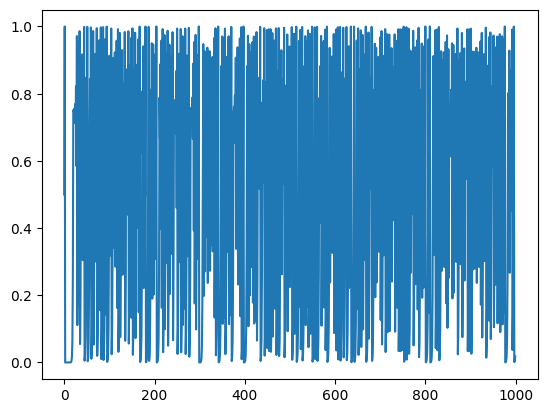

In [19]:
import matplotlib.pyplot as plt

plt.plot(data)
plt.show()

In [33]:
import numpy as np
import simpleaudio as sa # Für die Audiowiedergabe

# 1. Funktion zur Generierung der logistischen Serie
def generate_logistic_series(r, x0, num_iterations):
    series = [x0]
    for _ in range(num_iterations - 1):
        next_x = r * series[-1] * (1 - series[-1])
        series.append(next_x)
    return series

# Parameter für die logistische Gleichung
r = 4
x0 = 0.50000001
num_iterations = 100000 # Mehr Iterationen für eine hörbare Dauer

# Daten generieren
data = generate_logistic_series(r, x0, num_iterations)

# 2. Daten für Audiowiedergabe vorbereiten
# Die Werte der logistischen Gleichung liegen zwischen 0 und 1.
# Um sie hörbar zu machen, müssen wir sie in einen Wellenformbereich umwandeln.
# Wir skalieren sie auf den Bereich eines 16-Bit-Audiosignals (-32768 bis 32767).

sampling_rate = 44100  # Abtastrate in Hz (Standard für Audio)
# Skalierung der Daten auf den Bereich eines 16-Bit-Integer-Signals
audio_data = np.array(data)
audio_data = audio_data * 2.0 - 1.0  # Skalieren von [0, 1] auf [-1, 1]
audio_data = audio_data * 32767 # Skalieren auf 16-Bit-Integer-Bereich
audio_data = audio_data.astype(np.int16) # In 16-Bit-Integer umwandeln

# 3. Audio abspielen
play_obj = sa.play_buffer(audio_data, 1, 2, sampling_rate)
play_obj.wait_done() # Warten, bis die Wiedergabe abgeschlossen ist

In [21]:
!pip install simpleaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'simpleaudio' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'simpleaudio'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp311-cp311-macosx_11_0_arm64.whl size=2036408 sha256=7b30ea2d565179d6698dd644fa819e0c77204ae322b695899de232b3ea069cef
  Stored in directory: /Users/friedrichsiemers/Library/Caches/pip/wheels/44/74/11/9d2cf6ddf5d0dcc7750484a371b92fdb036f5496d1d4b42d08
Successfully built simpleaudio


In [ ]:
import numpy as np
import simpleaudio as sa

def generate_logistic_series(r, x0, num_iterations):
    series = [x0]
    for _ in range(num_iterations - 1):
        next_x = r * series[-1] * (1 - series[-1])
        series.append(np.clip(next_x, 0.0, 1.0))
    return series

# --- PARAMETER FÜR VERLANGSAMTE INTERMITTENZ ---
r = 3.8282
x0 = 0.2
num_iterations = 4000 
stretch_factor = 150 # <-- Erhöht für langsamere Wiedergabe

# Daten generieren und für Audio vorbereiten
data = generate_logistic_series(r, x0, num_iterations)
stretched_audio_data = np.repeat(data, stretch_factor)
scaled_audio_data = (stretched_audio_data * 2.0 - 1.0) * 32767
scaled_audio_data = scaled_audio_data.astype(np.int16)

# Audio abspielen
print(f"Spiele Signal mit r = {r} und stretch_factor = {stretch_factor} ab.")
print("Die Übergänge sind jetzt deutlich langsamer.")
play_obj = sa.play_buffer(scaled_audio_data, 1, 2, 44100)
play_obj.wait_done()
print("Wiedergabe beendet.")

Spiele Signal mit r = 3.8282 und stretch_factor = 150 ab.
Die Übergänge sind jetzt deutlich langsamer.


Starte Simulation...
Simulation und Phasenextraktion beendet in 1.24 Sekunden.
Anzahl gefundener laminarer Phasen: 63491038
Berechne laufende Varianz (mit Numba-beschleunigtem Online-Algorithmus)...
Statistik-Berechnung beendet in 0.4850 Sekunden.
Erstelle Plot...


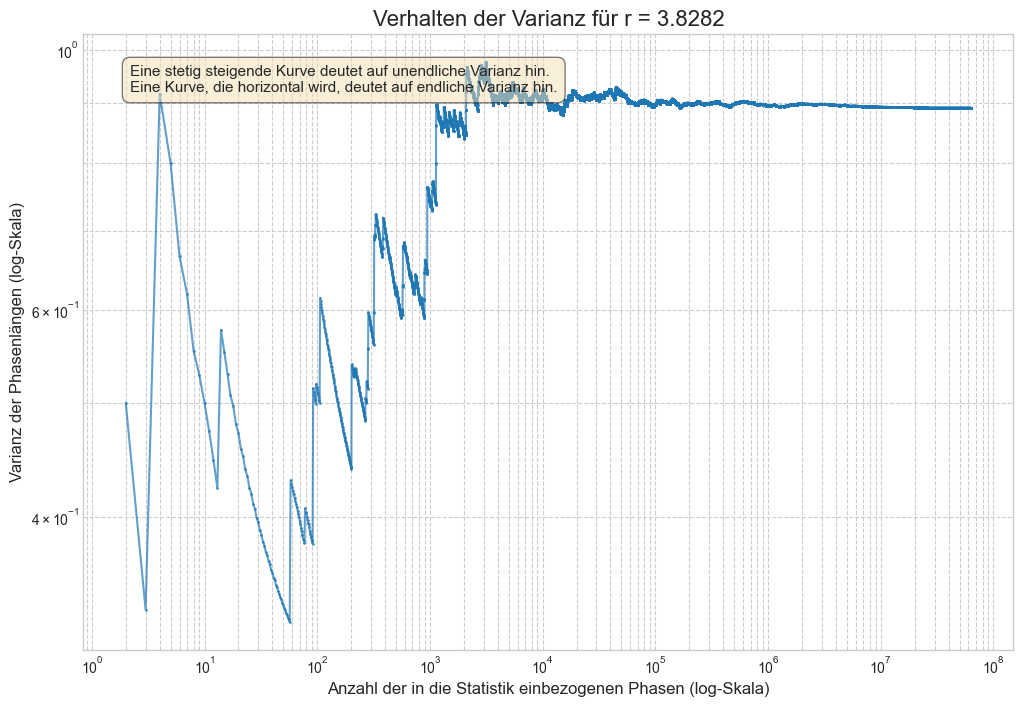

In [1]:
import numpy as np
import numba
import matplotlib.pyplot as plt
import time

# ==============================================================================
# 1. MASSIV BESCHLEUNIGTE FUNKTIONEN MIT NUMBA
# ==============================================================================

@numba.jit(nopython=True)
def generate_logistic_series_fast(r, x0, num_iterations):
    series = np.empty(num_iterations, dtype=np.float64)
    series[0] = x0
    for i in range(1, num_iterations):
        next_x = r * series[i-1] * (1 - series[i-1])
        series[i] = next_x
    return series

@numba.jit(nopython=True)
def get_laminar_phase_lengths(series, threshold):
    # Diese Implementierung ist bereits sehr schnell und bleibt unverändert.
    phase_lengths_list = []
    current_phase_length = 0
    is_above = series[0] > threshold
    for i in range(1, len(series)):
        current_phase_length += 1
        current_is_above = series[i] > threshold
        if current_is_above != is_above:
            phase_lengths_list.append(current_phase_length)
            current_phase_length = 0
            is_above = current_is_above
    return np.array(phase_lengths_list, dtype=np.int64)

# NEUE, SCHNELLE FUNKTION FÜR DIE LAUFENDE VARIANZ
@numba.jit(nopython=True)
def calculate_running_variance_fast(data):
    """Berechnet die laufende Varianz mit Welford's Online-Algorithmus."""
    n = 0
    mean = 0.0
    M2 = 0.0 # Summe der quadrierten Abweichungen vom Mittelwert
    
    variances = np.empty(len(data) - 1, dtype=np.float64)
    
    # Erster Datenpunkt
    n = 1
    mean = data[0]
    
    # Durchlaufe die restlichen Datenpunkte
    for i in range(1, len(data)):
        x = data[i]
        n += 1
        delta = x - mean
        mean += delta / n
        delta2 = x - mean
        M2 += delta * delta2
        
        # Stichprobenvarianz speichern
        variances[i-1] = M2 / (n - 1)
        
    return variances

# ==============================================================================
# 2. DAS EXPERIMENT DURCHFÜHREN
# ==============================================================================

# --- Parameter ---
r = 3.8282
x0 = 0.2
num_iterations = 100_000_000
threshold = 0.5

# --- Simulation ---
print("Starte Simulation...")
start_time = time.time()
series_data = generate_logistic_series_fast(r, x0, num_iterations)
laminar_lengths = get_laminar_phase_lengths(series_data, threshold)
sim_end_time = time.time()
print(f"Simulation und Phasenextraktion beendet in {sim_end_time - start_time:.2f} Sekunden.")
print(f"Anzahl gefundener laminarer Phasen: {len(laminar_lengths)}")


# --- Statistische Auswertung (JETZT AUCH SCHNELL) ---
print("Berechne laufende Varianz (mit Numba-beschleunigtem Online-Algorithmus)...")
variances = calculate_running_variance_fast(laminar_lengths)
# Der erste Wert der Varianz wird für n=2 berechnet, also ist die Anzahl der Phasen um 1 verschoben
phase_counts = np.arange(2, len(laminar_lengths) + 1)
stat_end_time = time.time()
print(f"Statistik-Berechnung beendet in {stat_end_time - sim_end_time:.4f} Sekunden.")


# ==============================================================================
# 3. VISUALISIERUNG DER ERGEBNISSE
# ==============================================================================
print("Erstelle Plot...")
# ... (Der Plotting-Teil bleibt exakt gleich)
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
ax.loglog(phase_counts, variances, marker='.', linestyle='-', markersize=2, alpha=0.7)
ax.set_title(f'Verhalten der Varianz für r = {r}', fontsize=16)
ax.set_xlabel('Anzahl der in die Statistik einbezogenen Phasen (log-Skala)', fontsize=12)
ax.set_ylabel('Varianz der Phasenlängen (log-Skala)', fontsize=12)
ax.grid(True, which="both", ls="--")
ax.text(0.05, 0.95, 'Eine stetig steigende Kurve deutet auf unendliche Varianz hin.\nEine Kurve, die horizontal wird, deutet auf endliche Varianz hin.',
        transform=ax.transAxes, fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))
plt.show()


--- Starte Experiment für: float32 ---
Experiment 'float32' beendet in 1.83 Sekunden.
Anzahl Phasen: 63805431

--- Starte Experiment für: float64 ---
Experiment 'float64' beendet in 1.71 Sekunden.
Anzahl Phasen: 63491038

--- Starte Experiment für: Decimal ---
HINWEIS: Decimal ist sehr langsam, führe nur 2000000 Iterationen durch.
Experiment 'Decimal' beendet in 0.80 Sekunden.
Anzahl Phasen: 1269846

Erstelle finalen Vergleichsplot...


/opt/miniconda3/envs/ag/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


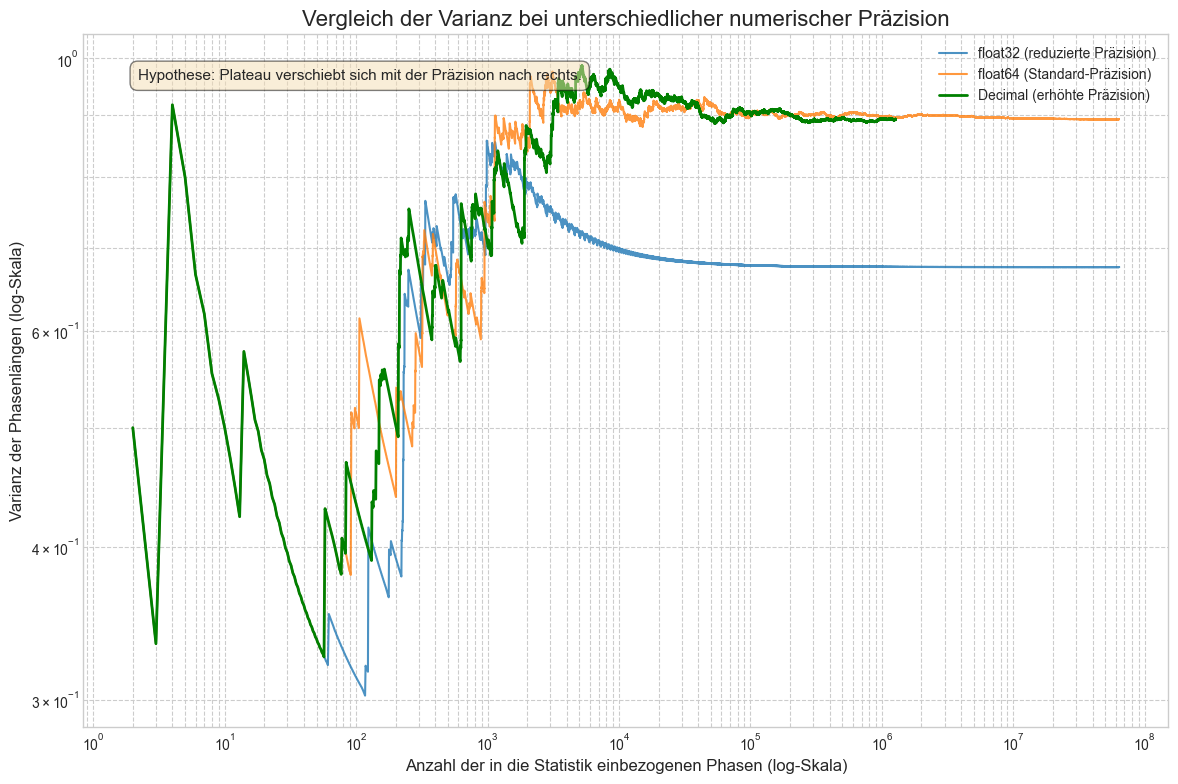

In [2]:
import numpy as np
import numba
import matplotlib.pyplot as plt
import time
from decimal import Decimal, getcontext

# ==============================================================================
# 1. FUNKTIONEN (NUMBA-VERSION FÜR FLOAT32/64, PURE PYTHON FÜR DECIMAL)
# ==============================================================================

# --- Numba-beschleunigte Versionen ---
@numba.jit(nopython=True)
def generate_logistic_series_fast(r, x0, num_iterations, dtype):
    series = np.empty(num_iterations, dtype=dtype)
    series[0] = dtype(x0)
    # Wichtig: r auch in den richtigen Datentyp konvertieren
    r_typed = dtype(r) 
    for i in range(1, num_iterations):
        series[i] = r_typed * series[i-1] * (dtype(1.0) - series[i-1])
    return series

@numba.jit(nopython=True)
def get_laminar_phase_lengths_fast(series, threshold, dtype):
    phase_lengths_list = []
    current_phase_length = 0
    threshold_typed = dtype(threshold)
    is_above = series[0] > threshold_typed
    for i in range(1, len(series)):
        current_phase_length += 1
        current_is_above = series[i] > threshold_typed
        if current_is_above != is_above:
            phase_lengths_list.append(current_phase_length)
            current_phase_length = 0
            is_above = current_is_above
    return np.array(phase_lengths_list, dtype=np.int64)

@numba.jit(nopython=True)
def calculate_running_variance_fast(data):
    # Diese Funktion bleibt gleich, sie ist bereits schnell
    n = 0; mean = 0.0; M2 = 0.0
    variances = np.empty(len(data) - 1, dtype=np.float64)
    if len(data) < 2: return variances
    n = 1; mean = data[0]
    for i in range(1, len(data)):
        x = data[i]
        n += 1; delta = x - mean; mean += delta / n
        delta2 = x - mean; M2 += delta * delta2
        variances[i-1] = M2 / (n - 1)
    return variances

# --- Reine Python-Version für hohe Präzision (LANGSAM!) ---
def generate_logistic_series_decimal(r, x0, num_iterations):
    getcontext().prec = 50 # Setze die Präzision auf 50 Stellen
    series = [Decimal(x0)]
    r_dec = Decimal(r)
    one_dec = Decimal(1)
    for _ in range(num_iterations - 1):
        next_x = r_dec * series[-1] * (one_dec - series[-1])
        series.append(next_x)
    return series

def get_laminar_phase_lengths_decimal(series, threshold):
    threshold_dec = Decimal(threshold)
    # Rest der Logik wie oben, aber mit Decimal-Objekten
    phase_lengths_list = []
    current_phase_length = 0
    is_above = series[0] > threshold_dec
    for i in range(1, len(series)):
        current_phase_length += 1
        current_is_above = series[i] > threshold_dec
        if current_is_above != is_above:
            phase_lengths_list.append(current_phase_length)
            current_phase_length = 0
            is_above = current_is_above
    return np.array(phase_lengths_list, dtype=np.int64)


# ==============================================================================
# 2. DAS EXPERIMENT DEFINIEREN UND DURCHFÜHREN
# ==============================================================================

def run_experiment(precision_type, num_iterations):
    print(f"\n--- Starte Experiment für: {precision_type} ---")
    start_time = time.time()
    
    r = 3.8282
    x0 = 0.2
    threshold = 0.5

    if precision_type == 'float32' or precision_type == 'float64':
        dtype = np.float32 if precision_type == 'float32' else np.float64
        series = generate_logistic_series_fast(r, x0, num_iterations, dtype)
        lengths = get_laminar_phase_lengths_fast(series, threshold, dtype)
    elif precision_type == 'Decimal':
        print(f"HINWEIS: Decimal ist sehr langsam, führe nur {num_iterations} Iterationen durch.")
        series = generate_logistic_series_decimal(str(r), str(x0), num_iterations)
        lengths = get_laminar_phase_lengths_decimal(series, str(threshold))
    else:
        raise ValueError("Unbekannter Präzisionstyp")
        
    variances = calculate_running_variance_fast(lengths)
    phase_counts = np.arange(2, len(lengths) + 1)
    
    end_time = time.time()
    print(f"Experiment '{precision_type}' beendet in {end_time - start_time:.2f} Sekunden.")
    print(f"Anzahl Phasen: {len(lengths)}")
    
    return phase_counts, variances

# --- Führe die Experimente durch ---
iterations_fast = 200_000_000
iterations_slow = 20_000_000 # Deutlich weniger für Decimal!

p_f32, v_f32 = run_experiment('float32', iterations_fast)
p_f64, v_f64 = run_experiment('float64', iterations_fast)
p_dec, v_dec = run_experiment('Decimal', iterations_slow)

# ==============================================================================
# 3. VERGLEICHENDE VISUALISIERUNG
# ==============================================================================
print("\nErstelle finalen Vergleichsplot...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 9))

ax.loglog(p_f32, v_f32, label='float32 (reduzierte Präzision)', alpha=0.8, zorder=1)
ax.loglog(p_f64, v_f64, label='float64 (Standard-Präzision)', alpha=0.8, zorder=2)
ax.loglog(p_dec, v_dec, label='Decimal (erhöhte Präzision)', color='green', linewidth=2, zorder=3)

ax.set_title('Vergleich der Varianz bei unterschiedlicher numerischer Präzision', fontsize=16)
ax.set_xlabel('Anzahl der in die Statistik einbezogenen Phasen (log-Skala)', fontsize=12)
ax.set_ylabel('Varianz der Phasenlängen (log-Skala)', fontsize=12)
ax.grid(True, which="both", ls="--")
ax.legend()
ax.text(0.05, 0.95, 'Hypothese: Plateau verschiebt sich mit der Präzision nach rechts.',
        transform=ax.transAxes, fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.show()


--- Starte Experiment für: float32 ---
Experiment 'float32' beendet in 9.23 Sekunden.
Anzahl Phasen: 319027179

--- Starte Experiment für: float64 ---
Experiment 'float64' beendet in 9.89 Sekunden.
Anzahl Phasen: 317464386

--- Starte Experiment für: Decimal ---
HINWEIS: Decimal ist sehr langsam, führe nur 20000000 Iterationen durch.
Experiment 'Decimal' beendet in 8.12 Sekunden.
Anzahl Phasen: 12692615

Erstelle finalen Vergleichsplot (mit Downsampling)...


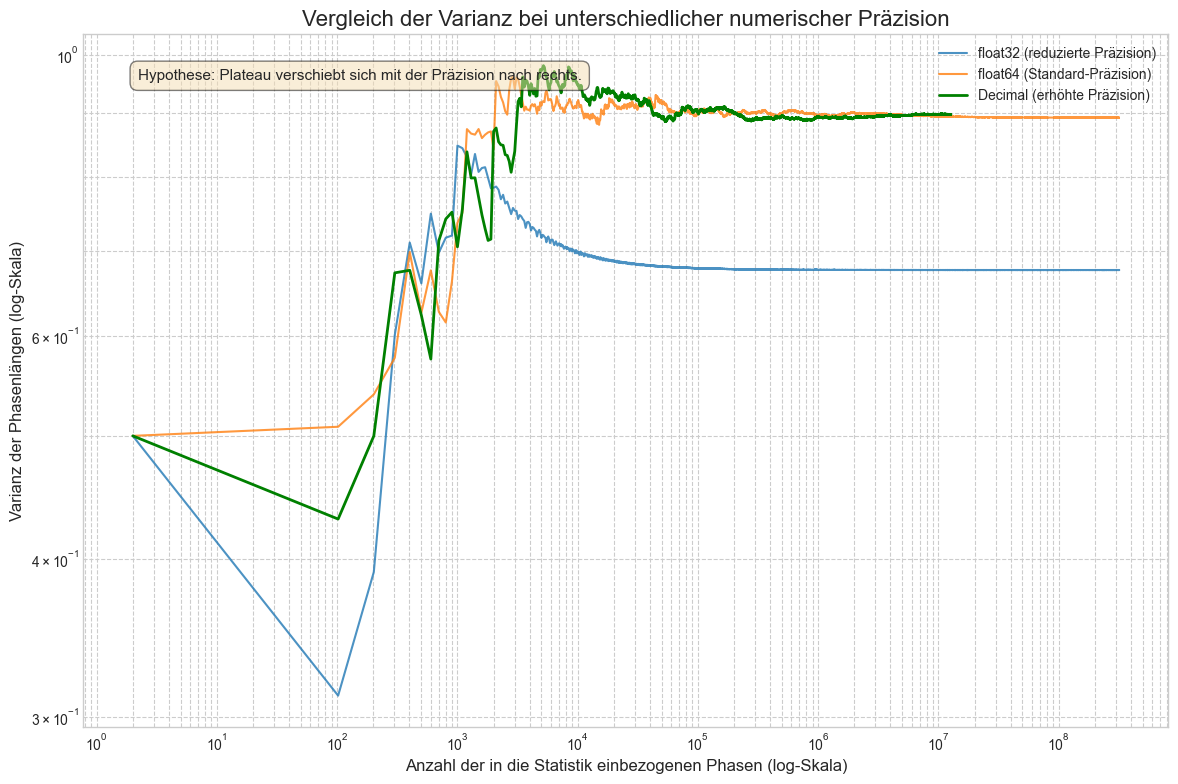

In [6]:
import numpy as np
import numba
import matplotlib.pyplot as plt
import time
from decimal import Decimal, getcontext

# Alle Funktionen bleiben exakt gleich wie zuvor...

@numba.jit(nopython=True)
def generate_logistic_series_fast(r, x0, num_iterations, dtype):
    series = np.empty(num_iterations, dtype=dtype)
    series[0] = dtype(x0)
    r_typed = dtype(r) 
    for i in range(1, num_iterations):
        series[i] = r_typed * series[i-1] * (dtype(1.0) - series[i-1])
    return series

@numba.jit(nopython=True)
def get_laminar_phase_lengths_fast(series, threshold, dtype):
    phase_lengths_list = []
    current_phase_length = 0
    threshold_typed = dtype(threshold)
    is_above = series[0] > threshold_typed
    for i in range(1, len(series)):
        current_phase_length += 1
        current_is_above = series[i] > threshold_typed
        if current_is_above != is_above:
            phase_lengths_list.append(current_phase_length)
            current_phase_length = 0
            is_above = current_is_above
    return np.array(phase_lengths_list, dtype=np.int64)

@numba.jit(nopython=True)
def calculate_running_variance_fast(data):
    n = 0; mean = 0.0; M2 = 0.0
    variances = np.empty(len(data) - 1, dtype=np.float64)
    if len(data) < 2: return variances
    n = 1; mean = data[0]
    for i in range(1, len(data)):
        x = data[i]
        n += 1; delta = x - mean; mean += delta / n
        delta2 = x - mean; M2 += delta * delta2
        variances[i-1] = M2 / (n - 1)
    return variances

def generate_logistic_series_decimal(r, x0, num_iterations):
    getcontext().prec = 50
    series = [Decimal(x0)]
    r_dec = Decimal(r); one_dec = Decimal(1)
    for _ in range(num_iterations - 1):
        series.append(r_dec * series[-1] * (one_dec - series[-1]))
    return series

def get_laminar_phase_lengths_decimal(series, threshold):
    threshold_dec = Decimal(threshold)
    phase_lengths_list = []
    current_phase_length = 0
    is_above = series[0] > threshold_dec
    for i in range(1, len(series)):
        current_phase_length += 1
        current_is_above = series[i] > threshold_dec
        if current_is_above != is_above:
            phase_lengths_list.append(current_phase_length)
            current_phase_length = 0
            is_above = current_is_above
    return np.array(phase_lengths_list, dtype=np.int64)

def run_experiment(precision_type, num_iterations):
    # Diese Funktion bleibt auch unverändert
    print(f"\n--- Starte Experiment für: {precision_type} ---")
    start_time = time.time()
    r = 3.8282; x0 = 0.2; threshold = 0.5
    if precision_type in ['float32', 'float64']:
        dtype = np.float32 if precision_type == 'float32' else np.float64
        series = generate_logistic_series_fast(r, x0, num_iterations, dtype)
        lengths = get_laminar_phase_lengths_fast(series, threshold, dtype)
    elif precision_type == 'Decimal':
        print(f"HINWEIS: Decimal ist sehr langsam, führe nur {num_iterations} Iterationen durch.")
        series = generate_logistic_series_decimal(str(r), str(x0), num_iterations)
        lengths = get_laminar_phase_lengths_decimal(series, str(threshold))
    variances = calculate_running_variance_fast(lengths)
    phase_counts = np.arange(2, len(lengths) + 1)
    end_time = time.time()
    print(f"Experiment '{precision_type}' beendet in {end_time - start_time:.2f} Sekunden.")
    print(f"Anzahl Phasen: {len(lengths)}")
    return phase_counts, variances

# --- ITERATIONSZAHLEN VERFÜNFFACHT ---
iterations_fast = 500_000_000 # von 100 Mio auf 500 Mio
iterations_slow = 20_000_000  # von 2 Mio auf 10 Mio

# --- Führe die massiven Experimente durch ---
p_f32, v_f32 = run_experiment('float32', iterations_fast)
p_f64, v_f64 = run_experiment('float64', iterations_fast)
p_dec, v_dec = run_experiment('Decimal', iterations_slow)

# ==============================================================================
# 3. VERGLEICHENDE VISUALISIERUNG (JETZT BLITZSCHNELL)
# ==============================================================================
print("\nErstelle finalen Vergleichsplot (mit Downsampling)...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 9))

# --- HIER IST DER TRICK: DOWNSAMPLING ---
# Wir plotten nur jeden 5000sten Punkt, um die Darstellung zu beschleunigen.
downsample_factor = 100

# Die [::factor] Notation wählt nur jeden n-ten Punkt aus dem Array aus.
ax.loglog(p_f32[::downsample_factor], v_f32[::downsample_factor], label='float32 (reduzierte Präzision)', alpha=0.8, zorder=1)
ax.loglog(p_f64[::downsample_factor], v_f64[::downsample_factor], label='float64 (Standard-Präzision)', alpha=0.8, zorder=2)
ax.loglog(p_dec[::downsample_factor], v_dec[::downsample_factor], label='Decimal (erhöhte Präzision)', color='green', linewidth=2, zorder=3)

ax.set_title('Vergleich der Varianz bei unterschiedlicher numerischer Präzision', fontsize=16)
ax.set_xlabel('Anzahl der in die Statistik einbezogenen Phasen (log-Skala)', fontsize=12)
ax.set_ylabel('Varianz der Phasenlängen (log-Skala)', fontsize=12)
ax.grid(True, which="both", ls="--")
ax.legend()
ax.text(0.05, 0.95, 'Hypothese: Plateau verschiebt sich mit der Präzision nach rechts.',
        transform=ax.transAxes, fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.show()


--- Starte Experiment für: float64 ---
Experiment 'float64' beendet in 27.91 Sekunden.
Anzahl Phasen: 317464386

--- Starte Experiment für: float32 ---
Experiment 'float32' beendet in 10.16 Sekunden.
Anzahl Phasen: 319027179

--- Starte Experiment für: float16 ---
HINWEIS: Numba unterstützt float16 nicht, nutze langsamen Python-Modus für 20000000 Iterationen.
Experiment 'float16' beendet in 7.25 Sekunden.
Anzahl Phasen: 13333323

Erstelle finalen Vergleichsplot (absteigende Präzision)...


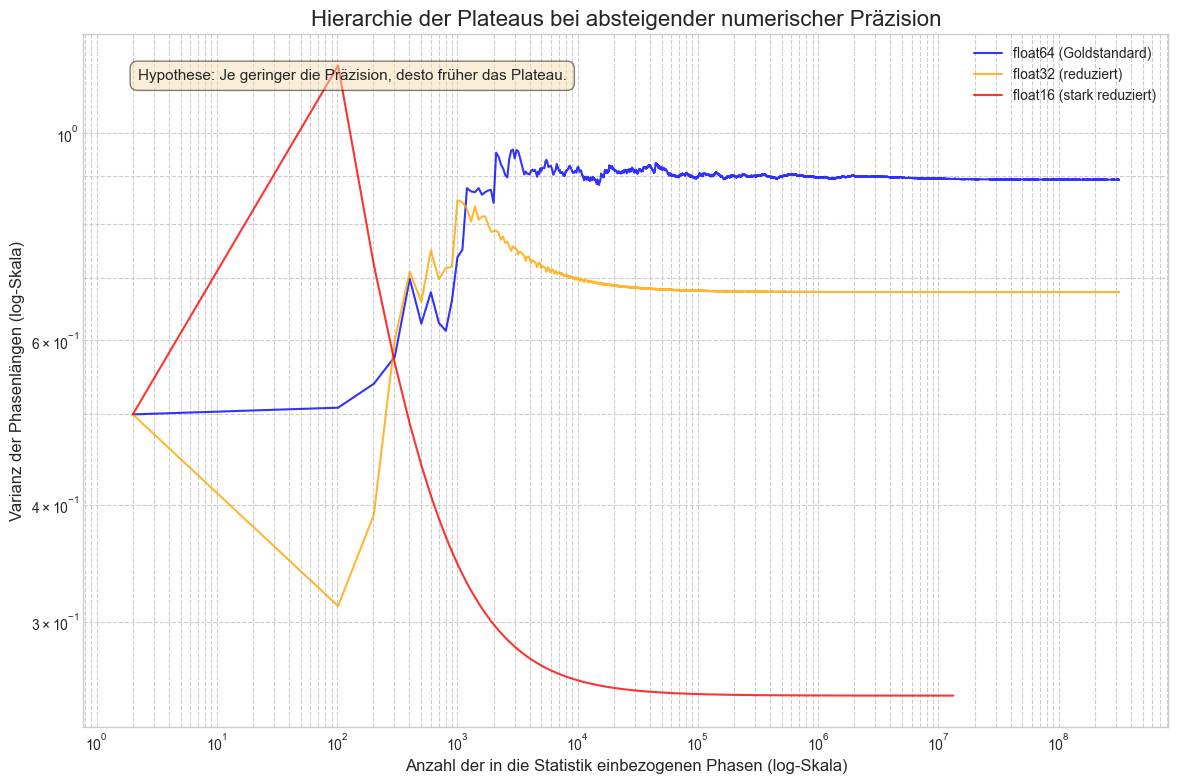

In [2]:
import numpy as np
import numba
import matplotlib.pyplot as plt
import time

# ==============================================================================
# 1. FUNKTIONEN
# ==============================================================================

# --- Numba-beschleunigte Versionen (für float64, float32) ---
@numba.jit(nopython=True)
def generate_logistic_series_fast(r, x0, num_iterations, dtype):
    series = np.empty(num_iterations, dtype=dtype)
    series[0] = dtype(x0)
    r_typed = dtype(r) 
    for i in range(1, num_iterations):
        series[i] = r_typed * series[i-1] * (dtype(1.0) - series[i-1])
    return series

# --- Reine Python/Numpy Version (Fallback für float16) ---
def generate_logistic_series_slow(r, x0, num_iterations, dtype):
    series = np.empty(num_iterations, dtype=dtype)
    series[0] = dtype(x0)
    r_typed = dtype(r)
    for i in range(1, num_iterations):
        series[i] = r_typed * series[i-1] * (dtype(1.0) - series[i-1])
    return series

# --- Numba-beschleunigte Phasen-Erkennung ---
@numba.jit(nopython=True)
def get_laminar_phase_lengths_fast(series, threshold):
    # Diese Funktion kann den dtype aus dem Array selbst ableiten, kein Problem hier.
    phase_lengths_list = []
    current_phase_length = 0
    is_above = series[0] > threshold
    for i in range(1, len(series)):
        current_phase_length += 1
        current_is_above = series[i] > threshold
        if current_is_above != is_above:
            phase_lengths_list.append(current_phase_length)
            current_phase_length = 0
            is_above = current_is_above
    return np.array(phase_lengths_list, dtype=np.int64)

# --- Numba-beschleunigte Varianz-Berechnung ---
@numba.jit(nopython=True)
def calculate_running_variance_fast(data):
    # Diese Funktion bleibt unverändert
    n = 0; mean = 0.0; M2 = 0.0
    variances = np.empty(len(data) - 1, dtype=np.float64)
    if len(data) < 2: return variances
    n = 1; mean = data[0]
    for i in range(1, len(data)):
        x = data[i]
        n += 1; delta = x - mean; mean += delta / n
        delta2 = x - mean; M2 += delta * delta2
        variances[i-1] = M2 / (n - 1)
    return variances

# ==============================================================================
# 2. DAS EXPERIMENT DEFINIEREN UND DURCHFÜHREN
# ==============================================================================

def run_experiment_flexible(precision_type, num_iterations):
    print(f"\n--- Starte Experiment für: {precision_type.__name__} ---")
    start_time = time.time()
    r = 3.8282; x0 = 0.2; threshold = 0.5
    
    # Weiche, um den Numba-Fehler bei float16 zu umgehen
    if precision_type == np.float16:
        print(f"HINWEIS: Numba unterstützt float16 nicht, nutze langsamen Python-Modus für {num_iterations} Iterationen.")
        series = generate_logistic_series_slow(r, x0, num_iterations, precision_type)
    else:
        series = generate_logistic_series_fast(r, x0, num_iterations, precision_type)
        
    # Die Phasen- und Varianz-Berechnung ist für alle schnell genug
    lengths = get_laminar_phase_lengths_fast(series.astype(np.float64), threshold) # Cast für Numba
    variances = calculate_running_variance_fast(lengths)
    phase_counts = np.arange(2, len(lengths) + 1)
    
    end_time = time.time()
    print(f"Experiment '{precision_type.__name__}' beendet in {end_time - start_time:.2f} Sekunden.")
    print(f"Anzahl Phasen: {len(lengths)}")
    
    return phase_counts, variances

# --- Experiment-Setup ---
iterations_fast = 500_000_000
iterations_slow_f16 = 20_000_000 # Eigene, reduzierte Iterationszahl für float16

precisions_to_test = [np.float64, np.float32, np.float16]
results = {}

for prec in precisions_to_test:
    iterations = iterations_slow_f16 if prec == np.float16 else iterations_fast
    p, v = run_experiment_flexible(prec, iterations)
    results[prec.__name__] = (p, v)

# ==============================================================================
# 3. VISUALISIERUNG
# ==============================================================================
print("\nErstelle finalen Vergleichsplot (absteigende Präzision)...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 9))

downsample_factor = 100 
colors = {'float64': 'blue', 'float32': 'orange', 'float16': 'red'}
labels = {'float64': 'float64 (Goldstandard)', 'float32': 'float32 (reduziert)', 'float16': 'float16 (stark reduziert)'}

for name, (p, v) in results.items():
    if len(p) > 0 and len(v) > 0:
        ax.loglog(p[::downsample_factor], v[::downsample_factor], label=labels[name], color=colors[name], alpha=0.8)

ax.set_title('Hierarchie der Plateaus bei absteigender numerischer Präzision', fontsize=16)
ax.set_xlabel('Anzahl der in die Statistik einbezogenen Phasen (log-Skala)', fontsize=12)
ax.set_ylabel('Varianz der Phasenlängen (log-Skala)', fontsize=12)
ax.grid(True, which="both", ls="--")
ax.legend()
ax.text(0.05, 0.95, 'Hypothese: Je geringer die Präzision, desto früher das Plateau.',
        transform=ax.transAxes, fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.show()

In [3]:
!pip install nolds

In [2]:
import numpy as np
import numba
import time
import nolds

# ==============================================================================
# 1. DATENGENERIERUNG (unverändert von zuvor)
# ==============================================================================

@numba.jit(nopython=True)
def generate_logistic_series_fast(r, x0, num_iterations):
    series = np.empty(num_iterations, dtype=np.float64)
    series[0] = x0
    r_typed = np.float64(r) 
    for i in range(1, num_iterations):
        series[i] = r_typed * series[i-1] * (np.float64(1.0) - series[i-1])
    return series

@numba.jit(nopython=True)
def get_laminar_phase_lengths_fast(series, threshold):
    phase_lengths_list = []
    current_phase_length = 0
    is_above = series[0] > threshold
    for i in range(1, len(series)):
        current_phase_length += 1
        current_is_above = series[i] > threshold
        if current_is_above != is_above:
            phase_lengths_list.append(current_phase_length)
            current_phase_length = 0
            is_above = current_is_above
    return np.array(phase_lengths_list, dtype=np.int64)

# --- Generiere unsere Testdaten ---
print("Generiere Testdaten für die Analyse...")
r = 3.8282
num_iterations = 200_000 # Ausreichend lang für gute Statistik
series_data = generate_logistic_series_fast(r, 0.2, num_iterations)
intermittent_lengths = get_laminar_phase_lengths_fast(series_data, 0.5)
print(f"Test-Datenreihe (Intermittenz) mit {len(intermittent_lengths)} Phasenlängen erzeugt.")

# --- Generiere unsere Kontrolldaten ---
# Zufällige Daten sollten einen DFA-Exponenten von ca. 0.5 haben
random_lengths = np.random.randn(len(intermittent_lengths))
print(f"Kontroll-Datenreihe (Zufallsrauschen) mit {len(random_lengths)} Werten erzeugt.")


# ==============================================================================
# 2. DFA-TEST DURCHFÜHREN
# ==============================================================================
print("\nFühre Detrended Fluctuation Analysis (DFA) durch...")

start_time = time.time()
# Berechne den DFA-Exponenten alpha für unsere Intermittenz-Serie
alpha_intermittent = nolds.dfa(intermittent_lengths)
end_time = time.time()
print(f"DFA für Intermittenz-Serie beendet in {end_time - start_time:.2f} Sekunden.")


start_time = time.time()
# Berechne den DFA-Exponenten alpha für die zufällige Kontrollserie
alpha_random = nolds.dfa(random_lengths)
end_time = time.time()
print(f"DFA für Kontroll-Serie beendet in {end_time - start_time:.2f} Sekunden.")


# ==============================================================================
# 3. ERGEBNISSE PRÄSENTIEREN
# ==============================================================================

print("\n\n--- TESTERGEBNISSE ---")
print(f"Nullhypothese (H₀): Kein Langzeitgedächtnis, α ≈ 0.5")
print(f"Alternativhypothese (H₁): Positives Langzeitgedächtnis, α > 0.5 (nahe 1.0)")
print("-" * 25)
print(f"Ergebnis für Kontrolldaten (Zufallsrauschen): α = {alpha_random:.4f}")
print(f"Ergebnis für unsere Intermittenz-Serie:     α = {alpha_intermittent:.4f}")
print("-" * 25)

# ==============================================================================
# 4. SCHLUSSFOLGERUNG
# ==============================================================================

if alpha_random < 0.55 and alpha_random > 0.45:
    print("\nSchlussfolgerung für Kontrolldaten: ✅ Das Ergebnis liegt wie erwartet nahe 0.5. Unser Test funktioniert korrekt.")
else:
    print("\nSchlussfolgerung für Kontrolldaten: ❌ Das Ergebnis weicht stark von 0.5 ab. Der Test könnte fehlerhaft sein.")

if alpha_intermittent > 0.75:
    print("Schlussfolgerung für unsere Serie: ✅ Das Ergebnis ist signifikant größer als 0.5. Wir haben starke Evidenz, die Nullhypothese H₀ zu verwerfen und die Alternativhypothese H₁ anzunehmen.")
    print("   ➡️ Das System besitzt ein Langzeitgedächtnis.")
else:
    print("Schlussfolgerung für unsere Serie: ❌ Das Ergebnis ist nicht signifikant größer als 0.5. Wir können die Nullhypothese nicht verwerfen.")
    print("   ➡️ Es gibt keine Evidenz für ein Langzeitgedächtnis.")

Generiere Testdaten für die Analyse...
Test-Datenreihe (Intermittenz) mit 126961 Phasenlängen erzeugt.
Kontroll-Datenreihe (Zufallsrauschen) mit 126961 Werten erzeugt.

Führe Detrended Fluctuation Analysis (DFA) durch...
DFA für Intermittenz-Serie beendet in 7.00 Sekunden.
DFA für Kontroll-Serie beendet in 7.00 Sekunden.


--- TESTERGEBNISSE ---
Nullhypothese (H₀): Kein Langzeitgedächtnis, α ≈ 0.5
Alternativhypothese (H₁): Positives Langzeitgedächtnis, α > 0.5 (nahe 1.0)
-------------------------
Ergebnis für Kontrolldaten (Zufallsrauschen): α = 0.4998
Ergebnis für unsere Intermittenz-Serie:     α = 0.4984
-------------------------

Schlussfolgerung für Kontrolldaten: ✅ Das Ergebnis liegt wie erwartet nahe 0.5. Unser Test funktioniert korrekt.
Schlussfolgerung für unsere Serie: ❌ Das Ergebnis ist nicht signifikant größer als 0.5. Wir können die Nullhypothese nicht verwerfen.
   ➡️ Es gibt keine Evidenz für ein Langzeitgedächtnis.


Generiere Testdaten für die Extreme Value Analysis...
Datenreihe mit 3172371 Phasenlängen erzeugt.
Erstelle Zeitreihen-Objekt mit Sekunden-Index...

Führe Extreme Value Analysis mit Block Maxima durch...


--- ERGEBNISSE DER GEV-MODELLANPASSUNG ---
Automatisch gewählte Verteilung: gumbel_r
Verfügbare angepasste Parameter: dict_keys(['loc', 'scale'])
Anmerkung: Die gewählte Verteilung (gumbel_r) hat keinen freien Shape-Parameter. ξ ist per Definition 0.

Angepasste GEV-Parameter: {'loc': np.float64(9.422040554270882), 'scale': 1.7117278472187982}
Entscheidender Formparameter ξ (xi) = 0.0000
---------------------------------------------
Schlussfolgerung: ❌ Der Formparameter ξ ist nahe Null oder negativ. Wir können H₀ nicht verwerfen.
   ➡️ Die Extreme verhalten sich 'zahm' (Gumbel- oder Weibull-Typ).

Erstelle Return Period Plot...


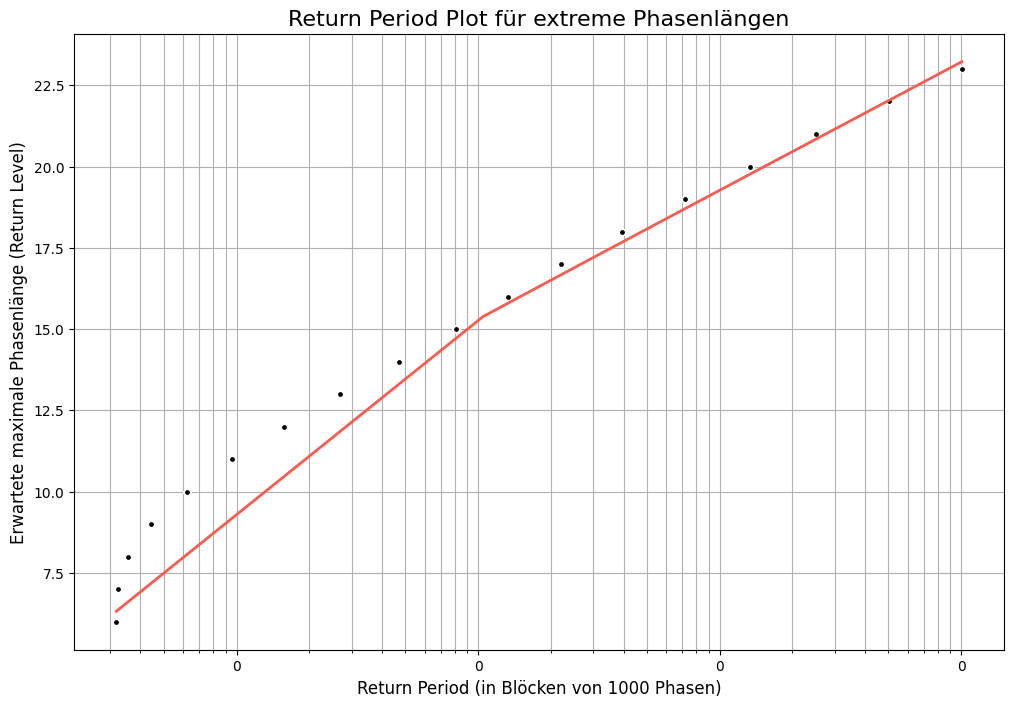

In [3]:
import numpy as np
import numba
import pandas as pd
from pyextremes.eva import EVA
import matplotlib.pyplot as plt

# ==============================================================================
# 1. DATENGENERIERUNG (Numba-beschleunigt)
# ==============================================================================

@numba.jit(nopython=True)
def generate_logistic_series_fast(r, x0, num_iterations):
    series = np.empty(num_iterations, dtype=np.float64)
    series[0] = x0
    r_typed = np.float64(r)
    for i in range(1, num_iterations):
        series[i] = r_typed * series[i-1] * (np.float64(1.0) - series[i-1])
    return series

@numba.jit(nopython=True)
def get_laminar_phase_lengths_fast(series, threshold):
    phase_lengths_list = []
    current_phase_length = 0
    is_above = series[0] > threshold
    for i in range(1, len(series)):
        current_phase_length += 1
        current_is_above = series[i] > threshold
        if current_is_above != is_above:
            phase_lengths_list.append(current_phase_length)
            current_phase_length = 0
            is_above = current_is_above
    return np.array(phase_lengths_list, dtype=np.int64)

# --- Generiere eine sehr lange Serie für robuste Statistik ---
print("Generiere Testdaten für die Extreme Value Analysis...")
num_iterations = 500_000_0
series_data = generate_logistic_series_fast(3.8282, 0.2, num_iterations)
laminar_lengths = get_laminar_phase_lengths_fast(series_data, 0.5)
print(f"Datenreihe mit {len(laminar_lengths)} Phasenlängen erzeugt.")

# Erstelle Zeitreihen-Objekt mit Sekunden-Index (Workaround)
print("Erstelle Zeitreihen-Objekt mit Sekunden-Index...")
data_series = pd.Series(
    data=laminar_lengths,
    index=pd.to_datetime(np.arange(len(laminar_lengths)), unit="s", origin="2000-01-01"),
    name="Phasenlänge"
)


# ==============================================================================
# 2. EXTREME VALUE ANALYSIS (EVA) DURCHFÜHREN
# ==============================================================================
print("\nFühre Extreme Value Analysis mit Block Maxima durch...")

model = EVA(data_series)
model.get_extremes(method="BM", block_size="1000s")
model.fit_model() # Lässt pyextremes die beste Verteilung wählen


# ==============================================================================
# 3. ERGEBNISSE PRÄSENTIEREN UND INTERPRETIEREN
# ==============================================================================

print("\n\n--- ERGEBNISSE DER GEV-MODELLANPASSUNG ---")

# DIAGNOSE-SCHRITT: Gib die von der Bibliothek gewählte Verteilung und ihre Parameter aus
chosen_distribution_name = model.model.distribution.name
fit_parameters = model.model.fit_parameters

print(f"Automatisch gewählte Verteilung: {chosen_distribution_name}")
print(f"Verfügbare angepasste Parameter: {fit_parameters.keys()}")

# FINALE, ROBUSTE LOGIK: Prüfe, ob der Shape-Parameter existiert
if 'c' in fit_parameters:
    shape_parameter_xi = fit_parameters['c']
else:
    # Wenn 'c' nicht existiert, bedeutet das, die Gumbel-Verteilung wurde gewählt, bei der xi=0 ist.
    shape_parameter_xi = 0.0
    print("Anmerkung: Die gewählte Verteilung (gumbel_r) hat keinen freien Shape-Parameter. ξ ist per Definition 0.")


print(f"\nAngepasste GEV-Parameter: {fit_parameters}")
print(f"Entscheidender Formparameter ξ (xi) = {shape_parameter_xi:.4f}")
print("-" * 45)

if shape_parameter_xi > 0.05:
    print("Schlussfolgerung: ✅ Der Formparameter ξ ist positiv. Wir haben starke Evidenz, H₀ zu verwerfen.")
    print("   ➡️ Die Extreme folgen einer Fréchet-Verteilung. Das ist die Signatur eines 'fat-tailed' Systems.")
else:
    print("Schlussfolgerung: ❌ Der Formparameter ξ ist nahe Null oder negativ. Wir können H₀ nicht verwerfen.")
    print("   ➡️ Die Extreme verhalten sich 'zahm' (Gumbel- oder Weibull-Typ).")

print("\nErstelle Return Period Plot...")
fig, ax = plt.subplots(figsize=(12, 8))
model.plot_return_values(ax=ax)
ax.set_title("Return Period Plot für extreme Phasenlängen", fontsize=16)
ax.set_xlabel("Return Period (in Blöcken von 1000 Phasen)", fontsize=12)
ax.set_ylabel("Erwartete maximale Phasenlänge (Return Level)", fontsize=12)
plt.show()

Generiere Testdaten für die Analyse...
Datenreihe mit 317687 Phasenlängen erzeugt.

Starte Robustheitsanalyse für verschiedene Blockgrößen...

--- Analysiere mit block_size = 10 ---
Ergebnis: ξ = -0.3848

--- Analysiere mit block_size = 50 ---
Ergebnis: ξ = 0.0000

--- Analysiere mit block_size = 100 ---
Ergebnis: ξ = 0.0000

--- Analysiere mit block_size = 500 ---
Ergebnis: ξ = 0.0000

--- Analysiere mit block_size = 1000 ---
Ergebnis: ξ = 0.0000

--- Analysiere mit block_size = 2000 ---
Ergebnis: ξ = 0.0000

--- Analysiere mit block_size = 5000 ---
Ergebnis: ξ = 0.0000

--- Analysiere mit block_size = 10000 ---
Ergebnis: ξ = 0.0000

--- Analysiere mit block_size = 20000 ---
Ergebnis: ξ = 0.0000


--- ZUSAMMENFASSUNG DER ROBUSTHEITSANALYSE ---
 block_size  num_extremes  shape_xi  location_mu  scale_sigma
         10         31769 -0.384848     2.254145     0.692151
         50          6354  0.000000     4.295160     1.773157
        100          3177  0.000000     5.537427     1.7437

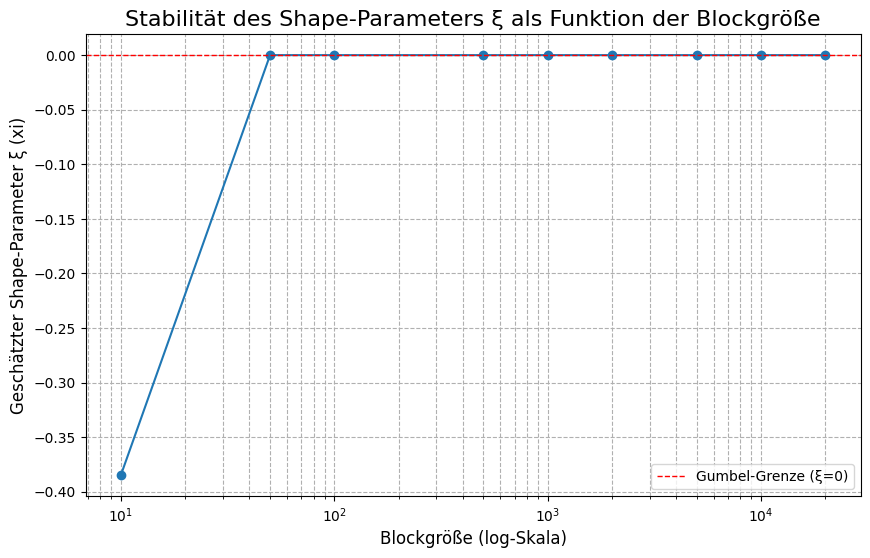

In [5]:
import numpy as np
import numba
import pandas as pd
from pyextremes.eva import EVA
import matplotlib.pyplot as plt

# ==============================================================================
# 1. DATENGENERIERUNG (Numba-beschleunigt)
# ==============================================================================
# Die Funktionen zur Datengenerierung bleiben unverändert.

@numba.jit(nopython=True)
def generate_logistic_series_fast(r, x0, num_iterations):
    series = np.empty(num_iterations, dtype=np.float64)
    series[0] = x0
    r_typed = np.float64(r)
    for i in range(1, num_iterations):
        series[i] = r_typed * series[i-1] * (np.float64(1.0) - series[i-1])
    return series

@numba.jit(nopython=True)
def get_laminar_phase_lengths_fast(series, threshold):
    phase_lengths_list = []
    current_phase_length = 0
    is_above = series[0] > threshold
    for i in range(1, len(series)):
        current_phase_length += 1
        current_is_above = series[i] > threshold
        if current_is_above != is_above:
            phase_lengths_list.append(current_phase_length)
            current_phase_length = 0
            is_above = current_is_above
    return np.array(phase_lengths_list, dtype=np.int64)

# --- Generiere eine sehr lange Serie als Basis für alle Tests ---
print("Generiere Testdaten für die Analyse...")
num_iterations = 500_000
series_data = generate_logistic_series_fast(3.8282, 0.2, num_iterations)
laminar_lengths = get_laminar_phase_lengths_fast(series_data, 0.5)
print(f"Datenreihe mit {len(laminar_lengths)} Phasenlängen erzeugt.")

data_series = pd.Series(
    data=laminar_lengths,
    index=pd.to_datetime(np.arange(len(laminar_lengths)), unit="s", origin="2000-01-01"),
    name="Phasenlänge"
)

# ==============================================================================
# 2. ROBUSTHEITSANALYSE DURCHFÜHREN
# ==============================================================================
# Definiere die zu testenden Blockgrößen
block_sizes_to_test = [10, 50, 100, 500, 1000, 2000, 5000, 10000, 20000]
results = []

print("\nStarte Robustheitsanalyse für verschiedene Blockgrößen...")
for size in block_sizes_to_test:
    print(f"\n--- Analysiere mit block_size = {size} ---")
    try:
        # Erstelle für jede Größe ein frisches Modell
        model = EVA(data_series)
        
        # Extrahiere Extreme mit der aktuellen Blockgröße
        model.get_extremes(method="BM", block_size=f"{size}s")
        
        # Passe das Modell an
        model.fit_model()
        
        # Extrahiere Ergebnisse
        fit_params = model.model.fit_parameters
        shape_xi = fit_params.get('c', 0.0) # .get ist sicherer als direkter Zugriff
        
        results.append({
            "block_size": size,
            "num_extremes": len(model.extremes),
            "shape_xi": shape_xi,
            "location_mu": fit_params.get('loc', np.nan),
            "scale_sigma": fit_params.get('scale', np.nan)
        })
        print(f"Ergebnis: ξ = {shape_xi:.4f}")
        
    except Exception as e:
        print(f"Fehler bei block_size={size}: {e}")

# ==============================================================================
# 3. ERGEBNISSE ZUSAMMENFASSEN UND VISUALISIEREN
# ==============================================================================
# Erstelle eine übersichtliche Tabelle mit den Ergebnissen
results_df = pd.DataFrame(results)
print("\n\n--- ZUSAMMENFASSUNG DER ROBUSTHEITSANALYSE ---")
print(results_df.to_string(index=False))

# Erstelle einen Plot, um die Stabilität des Shape-Parameters zu visualisieren
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(results_df["block_size"], results_df["shape_xi"], marker='o', linestyle='-')
ax.set_xscale('log') # Eine logarithmische x-Achse ist hier oft aufschlussreich
ax.set_title("Stabilität des Shape-Parameters ξ als Funktion der Blockgröße", fontsize=16)
ax.set_xlabel("Blockgröße (log-Skala)", fontsize=12)
ax.set_ylabel("Geschätzter Shape-Parameter ξ (xi)", fontsize=12)
ax.grid(True, which="both", ls="--")

# Füge eine Linie bei ξ=0 als Referenz hinzu
ax.axhline(0, color='red', linestyle='--', linewidth=1, label='Gumbel-Grenze (ξ=0)')
ax.legend()

plt.show()

Generiere Basis-Datenreihe und klassifiziere Phasen...

Daten generiert.
Ruhige Phasen gefunden: 814194, mittlere Länge: 8.6
Chaos-Phasen gefunden: 814193, mittlere Länge: 3.7

STARTE WORKFLOW FÜR: RUHIGE PHASEN

--- Schritt 0: Empirische Verteilung der Phasenlängen ---


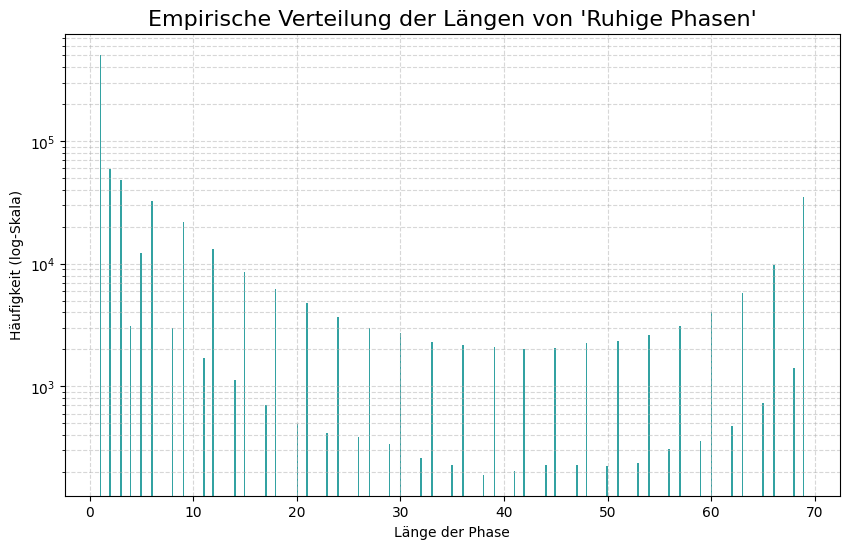


--- Schritt A: Stabilitätsanalyse ---
Ergebnisse der Stabilitätsanalyse:
 block_size  num_extremes  shape_xi
         50         16284  1.585765
        100          8142  1.150808
        200          4071 -0.866883
        500          1629 -0.866883


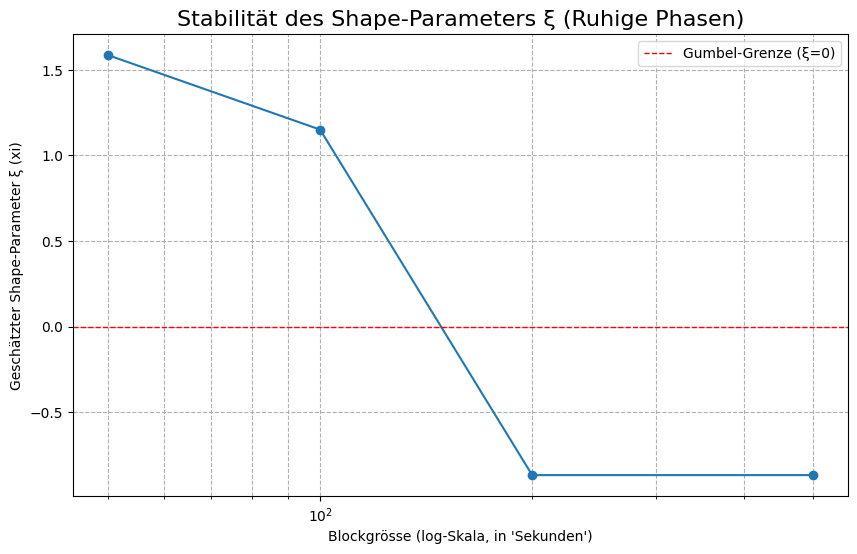


--- Schritt B: Detaillierte Analyse für Blockgrösse 200 ---

Führe Bootstrap-Analyse durch (Blockgrösse=200s, n=500)...
Fehler während des Bootstrappings: 'EVA' object has no attribute '_bootstrap'


/opt/miniconda3/envs/ag/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:409: RuntimeWarning: invalid value encountered in scalar divide
  return m3 / np.power(m2, 1.5)
/opt/miniconda3/envs/ag/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:409: RuntimeWarning: invalid value encountered in scalar divide
  return m3 / np.power(m2, 1.5)
/var/folders/bm/0j4cpchs2qx9r4_5l3k5pd5c0000gn/T/ipykernel_36903/4219966798.py:165: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


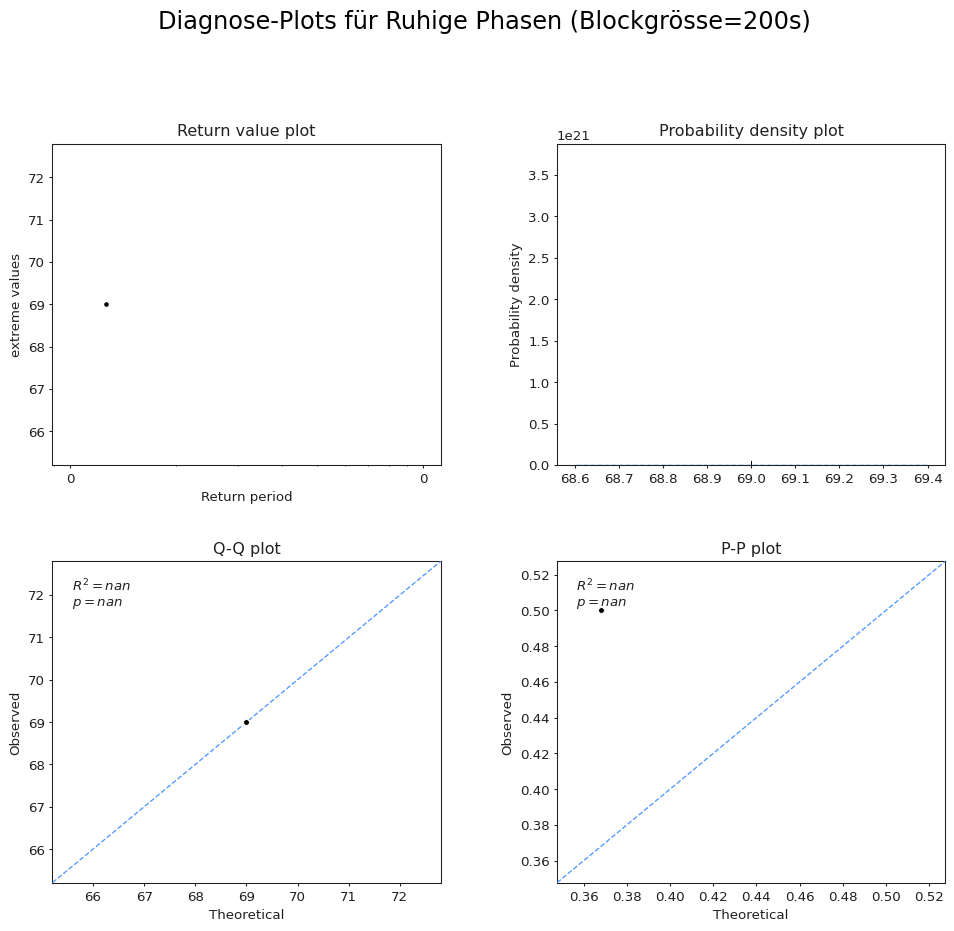


STARTE WORKFLOW FÜR: CHAOS-PHASEN

--- Schritt 0: Empirische Verteilung der Phasenlängen ---


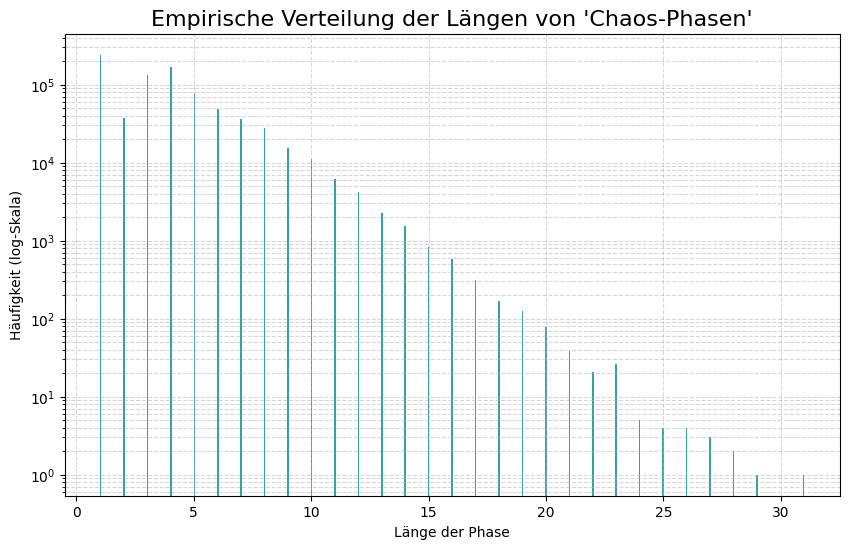


--- Schritt A: Stabilitätsanalyse ---
Ergebnisse der Stabilitätsanalyse:
 block_size  num_extremes  shape_xi
        200          4071       0.0
        500          1629       0.0
       1000           815       0.0
       2000           408       0.0


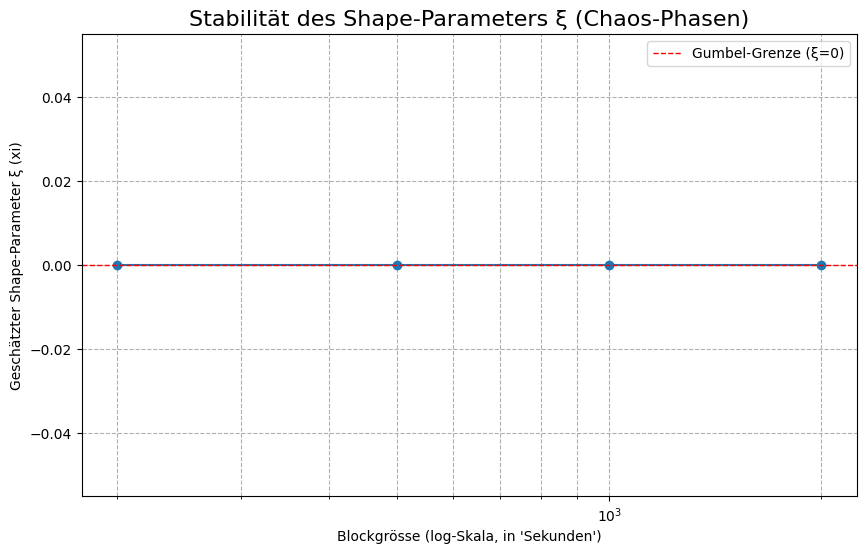


--- Schritt B: Detaillierte Analyse für Blockgrösse 1000 ---

Führe Bootstrap-Analyse durch (Blockgrösse=1000s, n=500)...
Fehler während des Bootstrappings: 'EVA' object has no attribute '_bootstrap'


/var/folders/bm/0j4cpchs2qx9r4_5l3k5pd5c0000gn/T/ipykernel_36903/4219966798.py:165: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


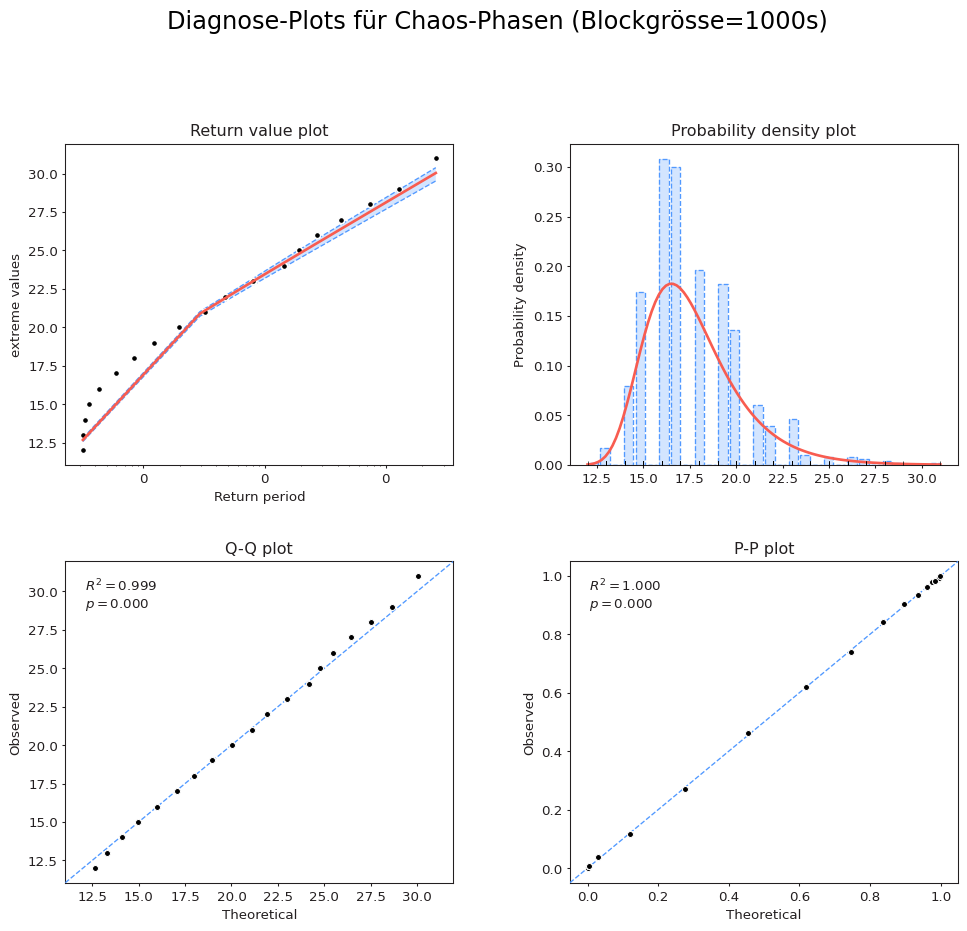

In [5]:
import numpy as np
import pandas as pd
from pyextremes.eva import EVA
import matplotlib.pyplot as plt
import warnings

# Numerische Warnungen von scipy während der Anpassung ignorieren
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# ==============================================================================
# 1. DATENGENERIERUNG UND PHASEN-KLASSIFIZIERUNG
# ==============================================================================

def generate_logistic_series_fast(r, x0, num_iterations):
    """Generiert die logistische Serie."""
    series = np.empty(num_iterations, dtype=np.float64)
    series[0] = x0
    r_typed = np.float64(r)
    for i in range(1, num_iterations):
        series[i] = r_typed * series[i-1] * (np.float64(1.0) - series[i-1])
    return series

def classify_and_get_runs(series):
    """
    Klassifiziert jeden Punkt als laminar oder chaotisch und misst die Längen
    der konsekutiven Phasen.
    """
    p1, p2, p3 = 0.156, 0.514, 0.957
    epsilon = 0.05
    
    is_laminar_series = np.empty(len(series), dtype=np.bool_)
    for i in range(len(series)):
        x = series[i]
        is_laminar = (np.abs(x - p1) < epsilon or 
                      np.abs(x - p2) < epsilon or 
                      np.abs(x - p3) < epsilon)
        is_laminar_series[i] = is_laminar

    laminar_lengths, chaotic_lengths = [], []
    if len(is_laminar_series) == 0:
        return np.array([0], dtype=np.int64), np.array([0], dtype=np.int64)

    current_length = 0
    current_state = is_laminar_series[0]
    for state in is_laminar_series:
        if state == current_state:
            current_length += 1
        else:
            if current_state:
                laminar_lengths.append(current_length)
            else:
                chaotic_lengths.append(current_length)
            current_state = state
            current_length = 1
    
    if current_state:
        laminar_lengths.append(current_length)
    else:
        chaotic_lengths.append(current_length)
        
    return np.array(laminar_lengths, dtype=np.int64), np.array(chaotic_lengths, dtype=np.int64)


# ==============================================================================
# 2. MODULARE ANALYSE-FUNKTIONEN
# ==============================================================================

def plot_empirical_distribution(data: np.ndarray, phase_name: str):
    """Erstellt ein Histogramm der empirischen Verteilung der Phasenlängen."""
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=max(50, int(np.sqrt(len(data))/2)), color='darkcyan', alpha=0.8, log=True)
    plt.title(f"Empirische Verteilung der Längen von '{phase_name}'", fontsize=16)
    plt.xlabel("Länge der Phase")
    plt.ylabel("Häufigkeit (log-Skala)")
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.show()

def perform_stability_analysis(data: np.ndarray, block_sizes: list) -> pd.DataFrame:
    """Führt eine EVA für verschiedene Blockgrössen durch, um die Stabilität des Shape-Parameters zu bewerten."""
    data_series = pd.Series(data=data, index=pd.to_datetime(np.arange(len(data)), unit="s", origin="2000-01-01"))
    results = []
    for size in block_sizes:
        try:
            model = EVA(data_series)
            model.get_extremes(method="BM", block_size=f"{size}s")
            if len(model.extremes) < 20:
                print(f"Blockgrösse {size}: Zu wenig Extremwerte ({len(model.extremes)}), überspringe.")
                continue
            model.fit_model()
            fit_params = model.model.fit_parameters
            results.append({"block_size": size, "num_extremes": len(model.extremes), "shape_xi": fit_params.get('c', 0.0)})
        except Exception as e:
            print(f"Fehler bei block_size={size}: {e}")
    return pd.DataFrame(results)

def plot_parameter_stability(df: pd.DataFrame, phase_name: str):
    """Erstellt den Stabilitäts-Plot für den Shape-Parameter."""
    if df.empty:
        print("Keine Daten für Stabilitäts-Plot vorhanden.")
        return
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df["block_size"], df["shape_xi"], marker='o', linestyle='-')
    ax.set_xscale('log')
    ax.set_title(f"Stabilität des Shape-Parameters ξ ({phase_name})", fontsize=16)
    ax.set_xlabel("Blockgrösse (log-Skala, in 'Sekunden')")
    ax.set_ylabel("Geschätzter Shape-Parameter ξ (xi)")
    ax.grid(True, which="both", ls="--")
    ax.axhline(0, color='red', linestyle='--', lw=1, label='Gumbel-Grenze (ξ=0)')
    ax.legend()
    plt.show()

def perform_bootstrap_analysis(data: np.ndarray, block_size: int, n_bootstrap: int):
    """Führt eine robuste Anpassung via Bootstrapping für eine feste Blockgrösse durch."""
    print(f"\nFühre Bootstrap-Analyse durch (Blockgrösse={block_size}s, n={n_bootstrap})...")
    data_series = pd.Series(data=data, index=pd.to_datetime(np.arange(len(data)), unit="s", origin="2000-01-01"))
    
    model = EVA(data_series)
    model.get_extremes(method="BM", block_size=f"{block_size}s")
    
    if len(model.extremes) < 20:
        print("Zu wenig Extremwerte für eine robuste Bootstrap-Analyse.")
        return None, None

    model.fit_model()
    
    try:
        bootstrap_parameters, _, _ = model._bootstrap(
            n_samples=n_bootstrap, full_output=True
        )
        bootstrap_parameters = bootstrap_parameters.rename(columns={"c": "shape"})
    except Exception as e:
        print(f"Fehler während des Bootstrappings: {e}")
        return model, None
    
    return model, bootstrap_parameters

def print_bootstrap_summary(summary_df: pd.DataFrame, phase_name: str):
    """Gibt eine formatierte Zusammenfassung der Bootstrap-Parameter-Verteilung aus."""
    if summary_df is None: return
    
    summary = summary_df.describe(percentiles=[0.025, 0.975])
    
    print("\n" + "-"*60)
    print(f"ZUSAMMENFASSUNG DER BOOTSTRAP-PARAMETER ({phase_name})")
    print("-"*60)
    print(f"{'Parameter':<10} | {'Mittelwert':>12} | {'95% Konfidenzintervall':>25}")
    print("-" * 60)
    for param_name in ['shape', 'location', 'scale']:
        if param_name in summary.columns:
            mean_val = summary.loc['mean', param_name]
            ci_low = summary.loc['2.5%', param_name]
            ci_high = summary.loc['97.5%', param_name]
            print(f"{param_name.capitalize():<10} | {mean_val:>12.4f} | [{ci_low:9.4f}, {ci_high:9.4f}]")
    print("-"*60)

def plot_diagnostic(model: EVA, phase_name: str, block_size: int):
    """Erstellt ein 2x2 Panel mit diagnostischen Plots."""
    if model is None or model.model is None:
        print("Kein angepasstes Modell für Diagnose-Plots vorhanden.")
        return
    fig, _ = model.plot_diagnostic(alpha=0.7, figsize=(12, 10))
    fig.suptitle(f"Diagnose-Plots für {phase_name} (Blockgrösse={block_size}s)", fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

# ==============================================================================
# 3. HAUPTSKRIPT-WORKFLOW
# ==============================================================================
if __name__ == "__main__":
    NUM_ITERATIONS = 1_000_000_0
    R_PARAM, X0 = 3.8282, 0.2

    print("Generiere Basis-Datenreihe und klassifiziere Phasen...")
    series_data = generate_logistic_series_fast(R_PARAM, X0, NUM_ITERATIONS)
    laminar_lengths, chaotic_lengths = classify_and_get_runs(series_data)
    
    print(f"\nDaten generiert.")
    print(f"Ruhige Phasen gefunden: {len(laminar_lengths)}, mittlere Länge: {np.mean(laminar_lengths):.1f}")
    print(f"Chaos-Phasen gefunden: {len(chaotic_lengths)}, mittlere Länge: {np.mean(chaotic_lengths):.1f}")

    analyses = [
        {"phase_name": "Ruhige Phasen", "data": laminar_lengths, "block_sizes_to_test": [50, 100, 200, 500], "chosen_block_size": 200},
        {"phase_name": "Chaos-Phasen", "data": chaotic_lengths, "block_sizes_to_test": [200, 500, 1000, 2000], "chosen_block_size": 1000},
    ]

    for config in analyses:
        print("\n" + "="*80)
        print(f"STARTE WORKFLOW FÜR: {config['phase_name'].upper()}")
        print("="*80)

        print("\n--- Schritt 0: Empirische Verteilung der Phasenlängen ---")
        plot_empirical_distribution(config["data"], config["phase_name"])

        print("\n--- Schritt A: Stabilitätsanalyse ---")
        stability_results = perform_stability_analysis(data=config["data"], block_sizes=config["block_sizes_to_test"])
        print("Ergebnisse der Stabilitätsanalyse:")
        print(stability_results.to_string(index=False))
        plot_parameter_stability(stability_results, config["phase_name"])

        print(f"\n--- Schritt B: Detaillierte Analyse für Blockgrösse {config['chosen_block_size']} ---")
        model_for_diag, bootstrap_params = perform_bootstrap_analysis(
            data=config["data"], block_size=config["chosen_block_size"], n_bootstrap=500
        )
        
        print_bootstrap_summary(bootstrap_params, config["phase_name"])
        plot_diagnostic(model_for_diag, config["phase_name"], config["chosen_block_size"])

In [8]:
import numpy as np
import numba
import warnings
import time

# Numerische Warnungen ignorieren
warnings.filterwarnings("ignore", category=RuntimeWarning)

# ==============================================================================
# 1. DATENGENERIERUNG MIT HOHER PRÄZISION (Unverändert)
# ==============================================================================

@numba.jit(nopython=True)
def generate_logistic_series_high_precision(r, x0, num_iterations):
    """
    Generiert die logistische Serie, beschleunigt mit Numba und mit expliziter
    Verwendung von 64-bit Fliesskommazahlen für erhöhte Präzision.
    """
    series = np.empty(num_iterations, dtype=np.float64)
    series[0] = np.float64(x0)
    r_typed = np.float64(r)
    one_typed = np.float64(1.0)
    
    for i in range(1, num_iterations):
        series[i] = r_typed * series[i-1] * (one_typed - series[i-1])
    return series

# ==============================================================================
# 2. PHASEN-KLASSIFIZIERUNG (MODIFIZIERT)
# ==============================================================================

@numba.jit(nopython=True)
def get_laminar_phase_lengths(series, epsilon): # Epsilon ist jetzt ein Parameter
    """
    Klassifiziert jeden Punkt als laminar oder nicht und misst die Längen
    der konsekutiven laminaren (ruhigen) Phasen für ein gegebenes Epsilon.
    """
    p1, p2, p3 = 0.156, 0.514, 0.957
    laminar_lengths = []
    current_length = 0
    is_in_laminar_phase = False

    for i in range(len(series)):
        x = series[i]
        is_laminar_point = (np.abs(x - p1) < epsilon or 
                            np.abs(x - p2) < epsilon or 
                            np.abs(x - p3) < epsilon)
        
        if is_laminar_point:
            current_length += 1
            is_in_laminar_phase = True
        else:
            if is_in_laminar_phase:
                laminar_lengths.append(current_length)
            is_in_laminar_phase = False
            current_length = 0
            
    if is_in_laminar_phase and current_length > 0:
        laminar_lengths.append(current_length)
        
    return np.array(laminar_lengths, dtype=np.int64)

# ==============================================================================
# 3. HAUPTSKRIPT FÜR DIE SENSITIVITÄTSANALYSE
# ==============================================================================

if __name__ == "__main__":
    # --- 1. Parameter definieren ---
    R_PARAM = 3.8282
    X0 = 0.2
    # Hohe Anzahl an Iterationen für robuste Statistik
    NUM_ITERATIONS = 600_000_000

    # Epsilon-Werte, die wir testen wollen
    epsilons_to_test = np.linspace(0.01, 0.09, 30)

    # --- 2. Daten einmalig generieren (zeitintensivster Schritt) ---
    print(f"Generiere Serie mit R={R_PARAM} und {NUM_ITERATIONS} Iterationen...")
    print("(Dies kann einige Minuten dauern, bitte haben Sie Geduld.)")
    start_time = time.time()
    series_data = generate_logistic_series_high_precision(R_PARAM, X0, NUM_ITERATIONS)
    end_time = time.time()
    print(f"Datengenerierung abgeschlossen in {end_time - start_time:.2f} Sekunden.")

    # --- 3. Maximale Phasenlänge für jeden Epsilon-Wert messen ---
    results = []
    print("\nStarte Sensitivitätsanalyse für Epsilon...")
    for epsilon in epsilons_to_test:
        print(f"  Analysiere mit Epsilon = {epsilon:.4f}...")
        laminar_lengths = get_laminar_phase_lengths(series_data, epsilon)
        
        # Finde die maximale Länge (und handle den Fall, dass keine Phasen gefunden wurden)
        max_len = 0
        if len(laminar_lengths) > 0:
            max_len = np.max(laminar_lengths)
            
        results.append({"epsilon": epsilon, "max_length": max_len})

    # --- 4. Ergebnisse ausgeben ---
    print("\n" + "="*40)
    print(" ERGEBNISSE DER SENSITIVITÄTSANALYSE")
    print("="*40)
    print("Epsilon    | Maximale gemessene Länge")
    print("-----------|--------------------------")
    for res in results:
        print(f"{res['epsilon']:.4f}     | {res['max_length']}")
    print("="*40)

Generiere Serie mit R=3.8282 und 600000000 Iterationen...
(Dies kann einige Minuten dauern, bitte haben Sie Geduld.)
Datengenerierung abgeschlossen in 2.29 Sekunden.

Starte Sensitivitätsanalyse für Epsilon...
  Analysiere mit Epsilon = 0.0100...
  Analysiere mit Epsilon = 0.0128...
  Analysiere mit Epsilon = 0.0155...
  Analysiere mit Epsilon = 0.0183...
  Analysiere mit Epsilon = 0.0210...
  Analysiere mit Epsilon = 0.0238...
  Analysiere mit Epsilon = 0.0266...
  Analysiere mit Epsilon = 0.0293...
  Analysiere mit Epsilon = 0.0321...
  Analysiere mit Epsilon = 0.0348...
  Analysiere mit Epsilon = 0.0376...
  Analysiere mit Epsilon = 0.0403...
  Analysiere mit Epsilon = 0.0431...
  Analysiere mit Epsilon = 0.0459...
  Analysiere mit Epsilon = 0.0486...
  Analysiere mit Epsilon = 0.0514...
  Analysiere mit Epsilon = 0.0541...
  Analysiere mit Epsilon = 0.0569...
  Analysiere mit Epsilon = 0.0597...
  Analysiere mit Epsilon = 0.0624...
  Analysiere mit Epsilon = 0.0652...
  Analysiere 

In [11]:
import numpy as np
import numba
import warnings
import time

# Numerische Warnungen ignorieren
warnings.filterwarnings("ignore", category=RuntimeWarning)

# ==============================================================================
# 1. DATENGENERIERUNG MIT HOHER PRÄZISION (Unverändert)
# ==============================================================================

@numba.jit(nopython=True)
def generate_logistic_series_high_precision(r, x0, num_iterations):
    """
    Generiert die logistische Serie, beschleunigt mit Numba und mit expliziter
    Verwendung von 64-bit Fliesskommazahlen für erhöhte Präzision.
    """
    series = np.empty(num_iterations, dtype=np.float64)
    series[0] = np.float64(x0)
    r_typed = np.float64(r)
    one_typed = np.float64(1.0)
    
    for i in range(1, num_iterations):
        series[i] = r_typed * series[i-1] * (one_typed - series[i-1])
    return series

# ==============================================================================
# 2. PHASEN-KLASSIFIZIERUNG (Unverändert)
# ==============================================================================

@numba.jit(nopython=True)
def get_laminar_phase_lengths(series, epsilon):
    """
    Klassifiziert jeden Punkt als laminar oder nicht und misst die Längen
    der konsekutiven laminaren (ruhigen) Phasen für ein gegebenes Epsilon.
    """
    p1, p2, p3 = 0.156, 0.514, 0.957
    laminar_lengths = []
    current_length = 0
    is_in_laminar_phase = False

    for i in range(len(series)):
        x = series[i]
        is_laminar_point = (np.abs(x - p1) < epsilon or 
                            np.abs(x - p2) < epsilon or 
                            np.abs(x - p3) < epsilon)
        
        if is_laminar_point:
            current_length += 1
            is_in_laminar_phase = True
        else:
            if is_in_laminar_phase:
                laminar_lengths.append(current_length)
            is_in_laminar_phase = False
            current_length = 0
            
    if is_in_laminar_phase and current_length > 0:
        laminar_lengths.append(current_length)
        
    return np.array(laminar_lengths, dtype=np.int64)

# ==============================================================================
# 3. HAUPTSKRIPT FÜR DIE SEGMENTIERTE ANALYSE
# ==============================================================================

if __name__ == "__main__":
    # --- 1. Parameter definieren ---
    R_PARAM = 3.8282
    X0 = 0.2
    NUM_ITERATIONS = 500_000_000
    NUM_CHUNKS = 10
    
    # Zehn Epsilon-Werte im interessanten Bereich
    epsilons_to_test = np.linspace(0.03, 0.07, 10)

    # --- 2. Daten einmalig generieren ---
    print(f"Generiere Serie mit R={R_PARAM} und {NUM_ITERATIONS} Iterationen...")
    print("(Dies kann einige Minuten dauern.)")
    start_time = time.time()
    series_data = generate_logistic_series_high_precision(R_PARAM, X0, NUM_ITERATIONS)
    end_time = time.time()
    print(f"Datengenerierung abgeschlossen in {end_time - start_time:.2f} Sekunden.")

    # --- 3. Segmentierte Analyse durchführen ---
    chunk_size = NUM_ITERATIONS // NUM_CHUNKS
    results = {} # Dictionary, um Ergebnisse zu speichern {epsilon: [mean1, mean2, ...]}

    print("\nStarte segmentierte Analyse...")
    for epsilon in epsilons_to_test:
        print(f"  Analysiere mit Epsilon = {epsilon:.4f}...")
        mean_lengths_for_epsilon = []
        for i in range(NUM_CHUNKS):
            # Den aktuellen Datenblock extrahieren
            start_index = i * chunk_size
            end_index = (i + 1) * chunk_size
            series_chunk = series_data[start_index:end_index]
            
            # Phasenlängen für diesen Block messen
            laminar_lengths = get_laminar_phase_lengths(series_chunk, epsilon)
            
            # Mittlere Länge berechnen (und Fall ohne Phasen abfangen)
            mean_len = 0.0
            if len(laminar_lengths) > 0:
                mean_len = np.mean(laminar_lengths)
            mean_lengths_for_epsilon.append(mean_len)
        results[epsilon] = mean_lengths_for_epsilon

    # --- 4. Ergebnisse in einer Tabelle ausgeben ---
    print("\n" + "="*120)
    print(" ERGEBNISSE: MITTLERE LÄNGE DER RUHIGEN PHASEN PRO 10%-DATENBLOCK")
    print("="*120)

    # Header-Zeile erstellen
    header = "Epsilon    | " + " | ".join([f"  {i*10}-{(i+1)*10}%  " for i in range(NUM_CHUNKS)])
    print(header)
    print("-" * 120)

    # Ergebnis-Zeilen erstellen
    for epsilon, means in results.items():
        # Jede Zeile besteht aus dem Epsilon-Wert gefolgt von den 10 Mittelwerten
        row_str = f"{epsilon:.4f}     | "
        row_str += " | ".join([f"{mean:8.2f}" for mean in means])
        print(row_str)
    print("="*120)

Generiere Serie mit R=3.8282 und 500000000 Iterationen...
(Dies kann einige Minuten dauern.)
Datengenerierung abgeschlossen in 1.98 Sekunden.

Starte segmentierte Analyse...
  Analysiere mit Epsilon = 0.0300...
  Analysiere mit Epsilon = 0.0344...
  Analysiere mit Epsilon = 0.0389...
  Analysiere mit Epsilon = 0.0433...
  Analysiere mit Epsilon = 0.0478...
  Analysiere mit Epsilon = 0.0522...
  Analysiere mit Epsilon = 0.0567...
  Analysiere mit Epsilon = 0.0611...
  Analysiere mit Epsilon = 0.0656...
  Analysiere mit Epsilon = 0.0700...

 ERGEBNISSE: MITTLERE LÄNGE DER RUHIGEN PHASEN PRO 10%-DATENBLOCK
Epsilon    |   0-10%   |   10-20%   |   20-30%   |   30-40%   |   40-50%   |   50-60%   |   60-70%   |   70-80%   |   80-90%   |   90-100%  
------------------------------------------------------------------------------------------------------------------------
0.0300     |     8.54 |     8.55 |     8.55 |     8.55 |     8.55 |     8.55 |     8.55 |     8.55 |     8.55 |     8.55
0.0344

In [12]:
import numpy as np
import numba
import warnings
import time

# Numerische Warnungen ignorieren
warnings.filterwarnings("ignore", category=RuntimeWarning)

# ==============================================================================
# 1. DATENGENERIERUNG MIT HOHER PRÄZISION (Unverändert)
# ==============================================================================

@numba.jit(nopython=True)
def generate_logistic_series_high_precision(r, x0, num_iterations):
    """
    Generiert die logistische Serie, beschleunigt mit Numba und mit expliziter
    Verwendung von 64-bit Fliesskommazahlen für erhöhte Präzision.
    """
    series = np.empty(num_iterations, dtype=np.float64)
    series[0] = np.float64(x0)
    r_typed = np.float64(r)
    one_typed = np.float64(1.0)
    
    for i in range(1, num_iterations):
        series[i] = r_typed * series[i-1] * (one_typed - series[i-1])
    return series

# ==============================================================================
# 2. PHASEN-KLASSIFIZIERUNG (Unverändert)
# ==============================================================================

@numba.jit(nopython=True)
def get_laminar_phase_lengths(series, epsilon):
    """
    Klassifiziert jeden Punkt als laminar oder nicht und misst die Längen
    der konsekutiven laminaren (ruhigen) Phasen für ein gegebenes Epsilon.
    """
    p1, p2, p3 = 0.156, 0.514, 0.957
    laminar_lengths = []
    current_length = 0
    is_in_laminar_phase = False

    for i in range(len(series)):
        x = series[i]
        is_laminar_point = (np.abs(x - p1) < epsilon or 
                            np.abs(x - p2) < epsilon or 
                            np.abs(x - p3) < epsilon)
        
        if is_laminar_point:
            current_length += 1
            is_in_laminar_phase = True
        else:
            if is_in_laminar_phase:
                laminar_lengths.append(current_length)
            is_in_laminar_phase = False
            current_length = 0
            
    if is_in_laminar_phase and current_length > 0:
        laminar_lengths.append(current_length)
        
    return np.array(laminar_lengths, dtype=np.int64)

# ==============================================================================
# 3. HELFERFUNKTION ZUR AUSGABE
# ==============================================================================

def print_results_table(results, statistic_key, title, num_chunks, format_str):
    """
    Gibt eine formatierte Tabelle für eine bestimmte Statistik (min, mean, max) aus.
    """
    print("\n" + "="*120)
    print(f" ERGEBNISSE: {title.upper()}")
    print("="*120)

    header = "Epsilon    | " + " | ".join([f"  {i*10}-{(i+1)*10}%  " for i in range(num_chunks)])
    print(header)
    print("-" * 120)

    for epsilon, stats_list in results.items():
        row_str = f"{epsilon:.4f}     | "
        row_str += " | ".join([format_str.format(stats[statistic_key]) for stats in stats_list])
        print(row_str)
    print("="*120)


# ==============================================================================
# 4. HAUPTSKRIPT FÜR DIE SEGMENTIERTE ANALYSE
# ==============================================================================

if __name__ == "__main__":
    # --- 1. Parameter definieren ---
    R_PARAM = 3.8282
    X0 = 0.2
    NUM_ITERATIONS = 500_000_000
    NUM_CHUNKS = 10
    
    epsilons_to_test = np.linspace(0.03, 0.07, 10)

    # --- 2. Daten einmalig generieren ---
    print(f"Generiere Serie mit R={R_PARAM} und {NUM_ITERATIONS} Iterationen...")
    print("(Dies kann einige Minuten dauern.)")
    start_time = time.time()
    series_data = generate_logistic_series_high_precision(R_PARAM, X0, NUM_ITERATIONS)
    end_time = time.time()
    print(f"Datengenerierung abgeschlossen in {end_time - start_time:.2f} Sekunden.")

    # --- 3. Segmentierte Analyse durchführen ---
    chunk_size = NUM_ITERATIONS // NUM_CHUNKS
    results = {}

    print("\nStarte segmentierte Analyse...")
    for epsilon in epsilons_to_test:
        print(f"  Analysiere mit Epsilon = {epsilon:.4f}...")
        stats_for_epsilon = []
        for i in range(NUM_CHUNKS):
            start_index = i * chunk_size
            end_index = (i + 1) * chunk_size
            series_chunk = series_data[start_index:end_index]
            laminar_lengths = get_laminar_phase_lengths(series_chunk, epsilon)
            
            if len(laminar_lengths) > 0:
                stats = {
                    'min': np.min(laminar_lengths),
                    'mean': np.mean(laminar_lengths),
                    'max': np.max(laminar_lengths)
                }
            else:
                stats = {'min': 0, 'mean': 0.0, 'max': 0} # Fallback
            stats_for_epsilon.append(stats)
        results[epsilon] = stats_for_epsilon

    # --- 4. Ergebnisse in drei Tabellen ausgeben ---
    print_results_table(results, 'min', "Minimale Länge der ruhigen Phasen", NUM_CHUNKS, "{:8.0f}")
    print_results_table(results, 'mean', "Mittlere Länge der ruhigen Phasen", NUM_CHUNKS, "{:8.2f}")
    print_results_table(results, 'max', "Maximale Länge der ruhigen Phasen", NUM_CHUNKS, "{:8.0f}")

Generiere Serie mit R=3.8282 und 500000000 Iterationen...
(Dies kann einige Minuten dauern.)
Datengenerierung abgeschlossen in 1.85 Sekunden.

Starte segmentierte Analyse...
  Analysiere mit Epsilon = 0.0300...
  Analysiere mit Epsilon = 0.0344...
  Analysiere mit Epsilon = 0.0389...
  Analysiere mit Epsilon = 0.0433...
  Analysiere mit Epsilon = 0.0478...
  Analysiere mit Epsilon = 0.0522...
  Analysiere mit Epsilon = 0.0567...
  Analysiere mit Epsilon = 0.0611...
  Analysiere mit Epsilon = 0.0656...
  Analysiere mit Epsilon = 0.0700...

 ERGEBNISSE: MINIMALE LÄNGE DER RUHIGEN PHASEN
Epsilon    |   0-10%   |   10-20%   |   20-30%   |   30-40%   |   40-50%   |   50-60%   |   60-70%   |   70-80%   |   80-90%   |   90-100%  
------------------------------------------------------------------------------------------------------------------------
0.0300     |        1 |        1 |        1 |        1 |        1 |        1 |        1 |        1 |        1 |        1
0.0344     |        1 |  

Generiere Daten und berechne Statistiken...

Alpha      | Emp. Mittelwert      | Theor. Mittelwert    | Emp. Varianz             
-------------------------------------------------------------------------------------
0.50       | 1.749e+08            | inf                  | 1.508e+23                
1.00       | 15.54                | inf                  | 1.135e+07                
1.50       | 2.982                | 3                    | 761.8                    
2.00       | 2                    | 2                    | 12.42                    
2.50       | 1.666                | 1.667                | 1.996                    
3.00       | 1.5                  | 1.5                  | 0.7276                   
3.50       | 1.4                  | 1.4                  | 0.3704                   

Erstelle Plots...


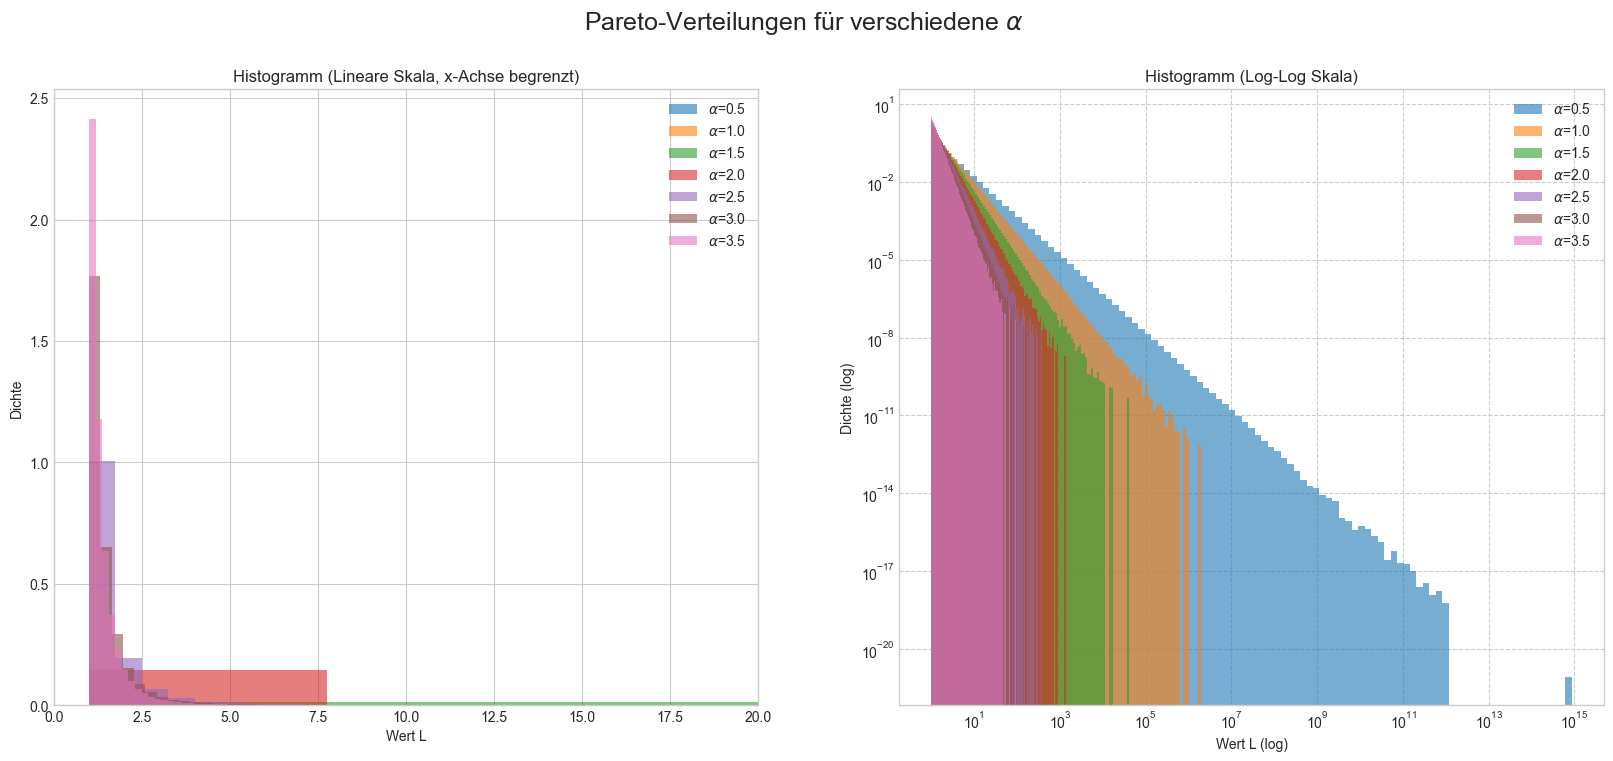

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Ignoriere Warnungen über sehr grosse Werte in der Varianzberechnung
warnings.filterwarnings("ignore", category=RuntimeWarning)

# --- 1. Parameter definieren ---
alphas_to_test = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
N_SAMPLES = 5_000_000

# --- 2. Daten generieren und Statistiken berechnen ---
results = []
datasets = {}

print("Generiere Daten und berechne Statistiken...")
for alpha in alphas_to_test:
    # Die numpy Pareto-Verteilung startet bei x=1, wenn man +1 addiert.
    # Der Parameter 'a' in numpy entspricht unserem 'alpha'.
    samples = np.random.pareto(alpha, N_SAMPLES) + 1
    
    # Empirische (gemessene) Werte berechnen
    mean_empirical = np.mean(samples)
    var_empirical = np.var(samples)
    
    # Theoretische Werte für den Vergleich
    mean_theoretical = alpha / (alpha - 1) if alpha > 1 else np.inf
    var_theoretical = (alpha / ((alpha - 1)**2 * (alpha - 2))) if alpha > 2 else np.inf

    # Ergebnisse speichern
    results.append({
        "alpha": alpha,
        "mean_empirical": mean_empirical,
        "var_empirical": var_empirical,
        "mean_theoretical": mean_theoretical,
        "var_theoretical": var_theoretical,
    })
    datasets[alpha] = samples

# --- 3. Ergebnisse in einer Tabelle ausgeben ---
print("\n" + "="*85)
print(f"{'Alpha':<10} | {'Emp. Mittelwert':<20} | {'Theor. Mittelwert':<20} | {'Emp. Varianz':<25}")
print("-" * 85)
for res in results:
    print(
        f"{res['alpha']:<10.2f} | "
        f"{res['mean_empirical']:<20.4g} | "
        f"{res['mean_theoretical']:<20.4g} | "
        f"{res['var_empirical']:<25.4g}"
    )
print("="*85)


# --- 4. Histogramme plotten ---
print("\nErstelle Plots...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle(r'Pareto-Verteilungen für verschiedene $\alpha$', fontsize=18)

# Linker Plot: Lineare Skala
# HINWEIS: Für alpha <= 2 wird dieser Plot durch extreme Ausreisser dominiert.
# Wir begrenzen die x-Achse, um die Form nahe dem Ursprung zu sehen.
ax1.set_title("Histogramm (Lineare Skala, x-Achse begrenzt)")
for alpha, data in datasets.items():
    ax1.hist(data, bins=500, density=True, alpha=0.6, label=fr'$\alpha$={alpha}')
ax1.set_xlabel("Wert L")
ax1.set_ylabel("Dichte")
ax1.set_xlim(0, 20) # Begrenzung der x-Achse für Lesbarkeit
ax1.grid(True)
ax1.legend()

# Rechter Plot: Log-Log-Skala (charakteristisch für Potenzgesetze)
ax2.set_title("Histogramm (Log-Log Skala)")
for alpha, data in datasets.items():
    # Logarithmische Bins sind für Log-Plots besser geeignet
    bins = np.logspace(np.log10(np.min(data)), np.log10(np.max(data)), 100)
    ax2.hist(data, bins=bins, density=True, alpha=0.6, label=fr'$\alpha$={alpha}')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel("Wert L (log)")
ax2.set_ylabel("Dichte (log)")
ax2.grid(True, which="both", ls="--")
ax2.legend()

plt.show()